# **Analyzing Airbnb 2019 Data with Supplementary Datasets Final Report** - **ID 12**

### **Prepared by;**
- **İlker Gül**  - **26352** - **ilkergul**

- **Doğan Can Hasanoğlu** - **26809**  - **hasanogludogan**


<img height="400" width="600" src="https://media.timeout.com/images/105632328/630/472/image.jpg"/>

## **A. INTRODUCTION**


Airbnb is an online platform that connects people who want to rent out their homes with people who seek accommodation in that particular place.Today, it encompasses more than 81,000 cities and 191 countries around the world ("Airbnb: Advantages and disadvantages," 2014). In our project we focused on the Airbnb data of 2019 which is included in a csv file.Our aim is to find general interesting facts that can be used by users in their further Airbnb usages. Explanation of graphs and hypothesis results will be insightful to cover aspects that are hidden in the datasets.
  
  As we will see in the next chapters of this project we also included different datasets which can be called supplement datasets including , New York Hotels, Pubs and Bars in New York and Party complaints in New York, to understand the living parameters of New York especially based New York City and to find similar outcomes from datasets if there are related to NYC to extract significant details that can be extracted to reveal from the content of the datasets.

  After showing detailed graphs and some hypotheses results related to data, we are going to use some machine learning techniques to see which machine learning models with different techniques will result with a more accurate score related to price. We will discuss this more in detail at the Machine Learning chapter. 

  



### **i. Problem Definition**


<font color="black">**Problem Definition:**</font> 

*First of all it would be more accurate to identify this project as a most possible heuristic approach to explore the main dataset(AirBnB 2019) and supplementary datasets, constructing a better understanding of the whole concept that we are dealing with and come up with a profound & effective predictions and foundings rather than specifying a problem and trying to find a possible null solution to the problem we created. Moreover instead we behaved in a more experimenting and exploring method. To generalize, we want to find the hidden relations and different aspects hidden in the dataset by extracting details from our data and support the details with interesting outcomes from our supplement datasets.*

<font color="black">**Approach:**</font> 

*Way we track along the project from beginning to the end has been led by curiosity, we've tried to find out intriguing parts of the datasets and extract the most useful and operational data. Data handling in this project had been done objectively and in such a unbiased manner. We consider all the datasets down to the last detail. First of all we started with exploring all the datasets from scratch and tried the associate all the possible study objects with each other. Then we decided upon questions to ask. Finally we attempted to answer those questions to the best of our ability.*



### **ii. Utilized Datasets**


#### **1. Adding libraries and mounting google drive process**


In [0]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive/CS210 PROJECT TEAM"

Mounted at /content/drive


In [0]:
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns

from scipy import stats

#### **2. Adding files to the notebook**


In [0]:
# In order to open Airbnb data
Airbnb_data_2019 = pd.read_csv('/content/drive/My Drive/CS 210 PROJECT TEAM/Datasets/AB_NYC_2019.csv')

#In order to open hotels excel file
New_York_Hotels = pd.read_excel('/content/drive/My Drive/CS 210 PROJECT TEAM/Datasets/new_york_hotels.xlsx')

#Noise complaints in ~500 meters radius from pickup place within 2 hours from pickup time.
Party_places_in_newyork = pd.read_csv('/content/drive/My Drive/CS 210 PROJECT TEAM/Datasets/party_in_nyc.csv')

#To locate bars and pubs to relate with airbnb rentals if possible
Pubs_and_Bars_in_NYC = pd.read_csv('/content/drive/My Drive/CS 210 PROJECT TEAM/Datasets/bar_locations.csv')

##### **a. Airbnb 2019 data detailed overview**


**Airbnb 2019 Dataframe shape is as follows:**

In [0]:
Airbnb_data_2019.shape

(48895, 16)

**Airbnb 2019 Dataframe columns are as follows:**

In [0]:
Airbnb_data_2019.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Airbnb 2019 Data datatypes are as follows:**

In [0]:
Airbnb_data_2019.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**General look for the Airbnb data and some changes in the data for the data exploration part are as follows:**


In [0]:
Airbnb_data_2019.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

In [0]:
Airbnb_data_2019.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [0]:
#I am filling the NaN values in reviews per month by 0 to fill the values for further processes
Airbnb_data_2019.fillna({"reviews_per_month":0}, inplace = True)
#I am converting object to datetime in case the use is needed
Airbnb_data_2019["last_review"]= pd.to_datetime(Airbnb_data_2019["last_review"])

###### **--> Some mathematical statistics about the columns are as follows:**


**a) Mathematical statistics about number of reviews** 

In [0]:
print("General statistics of number of reviews is as follows;")
Airbnb_data_2019.number_of_reviews.describe()

General statistics of number of reviews is as follows;


count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

**b) Mathematical Statistics about price**

In [0]:
print("General statistics of price is as follows;")
Airbnb_data_2019.price.describe()

General statistics of price is as follows;


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

**c) Mathematical Statistics about minimum nights**

In [0]:
print("General statistics of minimum nights is as follows;")
Airbnb_data_2019.minimum_nights.describe()

General statistics of minimum nights is as follows;


count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

**d) Mathematical Statistics about availability**


In [0]:
print("General statistics of availability is as follows;")
Airbnb_data_2019.availability_365.describe()

General statistics of availability is as follows;


count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

**e) Mathematical Statistics about calculated host listings count**


In [0]:
print("General statistics of calculated host listings count is as follows;")
Airbnb_data_2019.calculated_host_listings_count.describe()

General statistics of calculated host listings count is as follows;


count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

**f) Mathematical Statistics about reviews per month**


In [0]:
print("General statistics of reviews per month is as follows;")
Airbnb_data_2019.reviews_per_month.describe()

General statistics of reviews per month is as follows;


count    48895.000000
mean         1.090910
std          1.597283
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

**g) Correlation Matrix**

In [0]:
Airbnb_data_2019.corr().style.background_gradient(cmap = 'coolwarm')

##### **b. NYC Hotels data detailed overview**


**NYC Hotels dataframe shape is as follows:**


In [0]:
New_York_Hotels.shape

(1631, 11)

**NYC Hotels dataframe columns are as follows:**

In [0]:
New_York_Hotels.columns

Index(['ean_hotel_id', 'name', 'address1', 'city', 'state_province',
       'postal_code', 'latitude', 'longitude', 'star_rating', 'high_rate',
       'low_rate'],
      dtype='object')

**NYC Hotels data's datatypes are as follows:**

In [0]:
New_York_Hotels.dtypes

ean_hotel_id        int64
name               object
address1           object
city               object
state_province     object
postal_code        object
latitude          float64
longitude         float64
star_rating       float64
high_rate         float64
low_rate          float64
dtype: object

**General look for the NYC Hotels data and some changes in the data for the data exploration part are as follows:**


In [0]:
New_York_Hotels.head()

ean_hotel_id                                     name  ... high_rate  low_rate
0        269955       Hilton Garden Inn Albany/SUNY Area  ...  154.0272  124.0216
1        113431     Courtyard by Marriott Albany Thruway  ...  179.0100  134.0000
2        108151                    Radisson Hotel Albany  ...  134.1700   84.1600
3        254756  Hilton Garden Inn Albany Medical Center  ...  308.2807  228.4597
4        198232  CrestHill Suites SUNY University Albany  ...  169.3900   89.3900

[5 rows x 11 columns]

In [0]:
New_York_Hotels.isnull().sum()

ean_hotel_id      0
name              0
address1          0
city              0
state_province    0
postal_code       0
latitude          0
longitude         0
star_rating       1
high_rate         0
low_rate          0
dtype: int64

In [0]:
New_York_Hotels = New_York_Hotels.dropna(how= "any")
print("After removing Na values:\n")
New_York_Hotels.isnull().sum()

After removing Na values:



ean_hotel_id      0
name              0
address1          0
city              0
state_province    0
postal_code       0
latitude          0
longitude         0
star_rating       0
high_rate         0
low_rate          0
dtype: int64

**Hotel counts for each city is shown below:**

In [0]:
New_York_Hotels.city.value_counts()

New York           401
Brooklyn            73
Rochester           45
Albany              39
Niagara Falls       39
                  ... 
Massapequa Park      1
Wantagh              1
Schoharie            1
Springville          1
Eagle Bay            1
Name: city, Length: 315, dtype: int64

###### **--> Some mathematical statistics about the star ratings are as follows:**


**a) Mathematical Statistics about star rating**

In [0]:
New_York_Hotels.star_rating.describe()


count    1630.000000
mean        2.894785
std         0.777486
min         1.000000
25%         2.500000
50%         3.000000
75%         3.500000
max         5.000000
Name: star_rating, dtype: float64

**b) Correlation Matrix**

In [0]:
New_York_Hotels.corr().style.background_gradient(cmap = 'coolwarm')

##### **c. Pubs and Bars in New York data detailed overview**


**Pubs and Bars in New York dataframe shape is as follows:**


In [0]:
Pubs_and_Bars_in_NYC.shape

(2440, 7)

**Pubs and Bars in New York dataframe columns are as follows:**

In [0]:
Pubs_and_Bars_in_NYC.columns

Index(['Location Type', 'Incident Zip', 'City', 'Borough', 'Latitude',
       'Longitude', 'num_calls'],
      dtype='object')

**Pubs and Bars in New York data's datatypes are as follows:**

In [0]:
Pubs_and_Bars_in_NYC.dtypes

Location Type     object
Incident Zip     float64
City              object
Borough           object
Latitude         float64
Longitude        float64
num_calls          int64
dtype: object

**General look for the Pubs and Bars in New York data and some changes in the data for the data exploration part are as follows:**

In [0]:
Pubs_and_Bars_in_NYC.head()

Location Type  Incident Zip  ...  Longitude num_calls
0  Club/Bar/Restaurant       10308.0  ... -74.141155        40
1  Club/Bar/Restaurant       10012.0  ... -73.998842        18
2  Club/Bar/Restaurant       10308.0  ... -74.141040        21
3  Club/Bar/Restaurant       10034.0  ... -73.928258       160
4  Club/Bar/Restaurant       11220.0  ... -74.020285        17

[5 rows x 7 columns]

In [0]:
Pubs_and_Bars_in_NYC.isnull().sum()

Location Type    0
Incident Zip     0
City             0
Borough          0
Latitude         0
Longitude        0
num_calls        0
dtype: int64

In [0]:
Pubs_and_Bars_in_NYC = Pubs_and_Bars_in_NYC.dropna(how= "any")
Pubs_and_Bars_in_NYC.Borough.value_counts()


MANHATTAN        1076
BROOKLYN          736
QUEENS            418
BRONX             141
STATEN ISLAND      64
Unspecified         5
Name: Borough, dtype: int64

###### **--> Some mathematical statistics about the number of calls are as follows:**


In [0]:
Pubs_and_Bars_in_NYC.num_calls.describe()

count    2440.000000
mean       37.025820
std        59.641884
min        10.000000
25%        14.000000
50%        21.000000
75%        40.000000
max      1513.000000
Name: num_calls, dtype: float64

**Correlation Matrix**

In [0]:
Pubs_and_Bars_in_NYC.corr().style.background_gradient(cmap = 'coolwarm')

##### **d. Party Places in New York data detailed overview**


**Party Places in New York dataframe shape is as follows:**


In [0]:
Party_places_in_newyork.shape

(225414, 8)

**Party Places in New York dataframe columns are as follows:**

In [0]:
Party_places_in_newyork.columns

Index(['Created Date', 'Closed Date', 'Location Type', 'Incident Zip', 'City',
       'Borough', 'Latitude', 'Longitude'],
      dtype='object')

**Party Places in New York data's datatypes are as follows:**

In [0]:
Party_places_in_newyork.dtypes

Created Date      object
Closed Date       object
Location Type     object
Incident Zip     float64
City              object
Borough           object
Latitude         float64
Longitude        float64
dtype: object

**General look for the Party Places in New York data and some changes in the data for the data exploration part are as follows:**

In [0]:
Party_places_in_newyork.head()

Created Date          Closed Date  ...   Latitude  Longitude
0  2015-12-31 00:01:15  2015-12-31 03:48:04  ...  40.866183 -73.918930
1  2015-12-31 00:02:48  2015-12-31 04:36:13  ...  40.859324 -73.931237
2  2015-12-31 00:03:25  2015-12-31 00:40:15  ...  40.799415 -73.953371
3  2015-12-31 00:03:26  2015-12-31 01:53:38  ...  40.678285 -73.994668
4  2015-12-31 00:05:10  2015-12-31 03:49:10  ...  40.850304 -73.938516

[5 rows x 8 columns]

In [0]:
Party_places_in_newyork = Party_places_in_newyork.dropna(how= "any")
Party_places_in_newyork.isnull().sum()

Created Date     0
Closed Date      0
Location Type    0
Incident Zip     0
City             0
Borough          0
Latitude         0
Longitude        0
dtype: int64

In [0]:
Party_places_in_newyork['Created Date'] = pd.to_datetime(Party_places_in_newyork['Created Date'])
Party_places_in_newyork['complain_hour'] = Party_places_in_newyork['Created Date'].dt.hour
Party_places_in_newyork.Borough.value_counts()


BROOKLYN         68757
MANHATTAN        63883
BRONX            47595
QUEENS           38224
STATEN ISLAND     5402
Name: Borough, dtype: int64

**Correlation Matrix**

In [0]:
Party_places_in_newyork.corr().style.background_gradient(cmap = 'coolwarm')

## **B. Data Exploration**




### **i. Airbnb 2019 Data**


#### **1. Visual graphs and approachments related to data content**


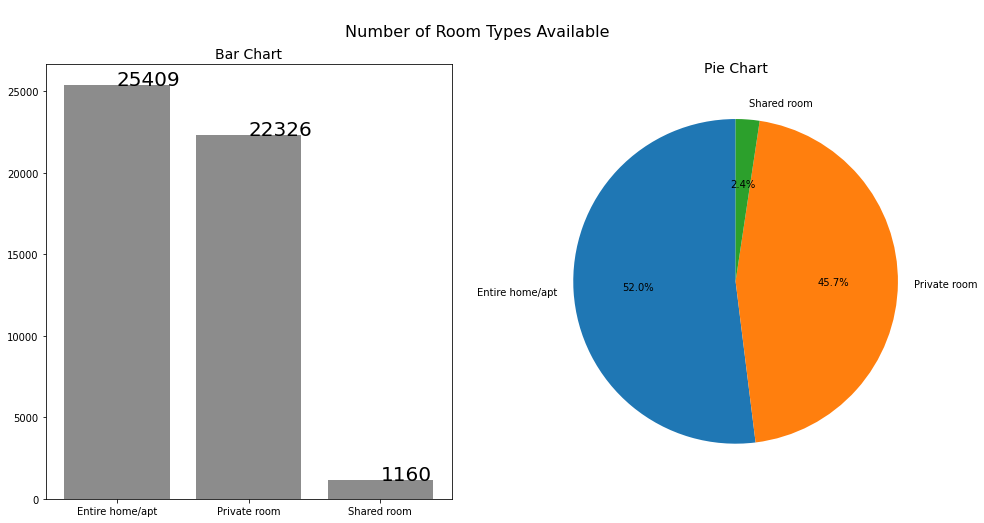

In [0]:
Bar_points = ["Entire home/apt", "Private room", "Shared room" ]
Bar_data = [Airbnb_data_2019[Airbnb_data_2019['room_type'] == 'Entire home/apt'].shape[0],Airbnb_data_2019[Airbnb_data_2019['room_type'] == 'Private room'].shape[0]
            ,Airbnb_data_2019[Airbnb_data_2019['room_type'] == 'Shared room'].shape[0]]
fig, axes = plt.subplots(1, 2 , sharex= False ,sharey= False, figsize = (16,8))
axes[0].bar(Bar_points, Bar_data, color = "gray", alpha = 0.9 )

for index, value in enumerate(Bar_data):
    axes[0].text(index, value, str(value), fontsize = 20)
axes[0].set_title("Bar Chart",fontsize = 14)
axes[1].pie(Bar_data, labels=Bar_points, autopct = '%1.1f%%', shadow= False , startangle=90 )
axes[1].set_title("Pie Chart",fontsize = 14)
fig.suptitle("\nNumber of Room Types Available\n", fontsize = 16)

plt.show()

**By showing the number of room types available in both pie chart and bar chart we want to see the distribution of room type options in Airbnb Data. We can conclude that the Entire home/apt option is the leading option by having 52.0% of the whole market in Airbnb in 2019. The least one is the shared room option with having a 2.4% of the market. We think that it is mainly related to the people’s preference of privacy. Because having a shared room is the least secured private option among other options. People tend to have privacy when they are travelling for a job or a vacation mostly. Hence, having an entire home/apt from Airbnb leads the market.**




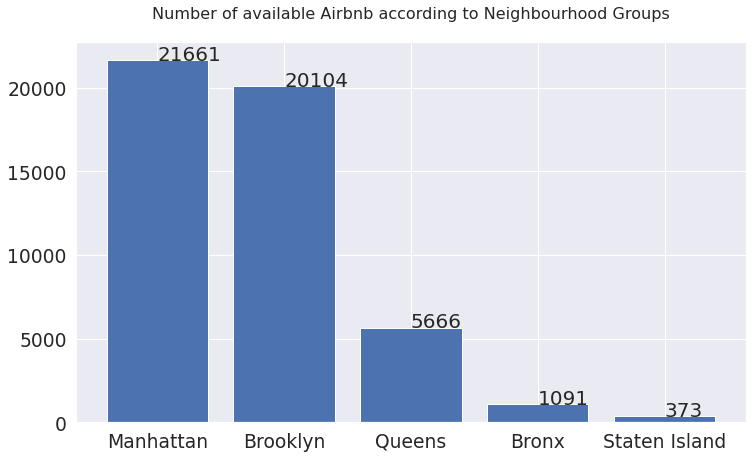

In [0]:
plt.title("Number of available Airbnb according to Neighbourhood Groups\n", fontsize = 16)
categories1 = ["Manhattan","Brooklyn","Queens","Bronx","Staten Island"]
plt.bar(categories1, Airbnb_data_2019.neighbourhood_group.value_counts())
for index, value in enumerate(Airbnb_data_2019.neighbourhood_group.value_counts()):
    plt.text(index, value, str(value), fontsize = 20)

**We want to show the available options’ distribution with respect to neighbourhood groups. We think that since Manhattan and Brooklyn have the most options for shopping, job areas and other visiting purposes these two neighbourhood groups will lead the possible options. As you can see, we were right in our opinion about Manhattan and Brooklyn. But we were not waiting less than 500 options in Staten Island even though we think it will be the least preferred neighbourhood in the comparison.**

(array([9.000e+00, 1.100e+01, 1.200e+02, 6.120e+02, 1.039e+03, 1.963e+03,
        1.752e+03, 1.695e+03, 1.050e+03, 1.215e+03, 1.105e+03, 1.423e+03,
        6.520e+02, 7.000e+02, 8.760e+02, 4.980e+02, 1.124e+03, 1.840e+02,
        3.750e+02, 4.560e+02, 3.170e+02, 2.590e+02, 6.220e+02, 7.800e+01,
        1.250e+02, 1.910e+02, 2.500e+01, 6.800e+01, 3.540e+02, 5.200e+01,
        1.020e+02, 3.600e+01, 4.100e+01, 2.090e+02, 1.100e+01, 1.100e+01,
        4.200e+01, 1.700e+01, 1.200e+01, 1.300e+02, 9.000e+00, 7.000e+00,
        3.200e+01, 1.200e+01, 3.200e+01, 6.100e+01, 6.000e+00, 1.100e+01,
        1.000e+00, 4.000e+00, 4.900e+01, 4.000e+00, 2.000e+00, 1.200e+01,
        4.000e+00, 1.100e+01, 5.800e+01, 0.000e+00, 1.000e+00, 9.000e+00,
        0.000e+00, 2.100e+01, 0.000e+00, 0.000e+00, 5.000e+00, 2.000e+00,
        6.000e+00, 2.700e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.600e+01, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.200e+01, 0.000e+00, 0.000e+0

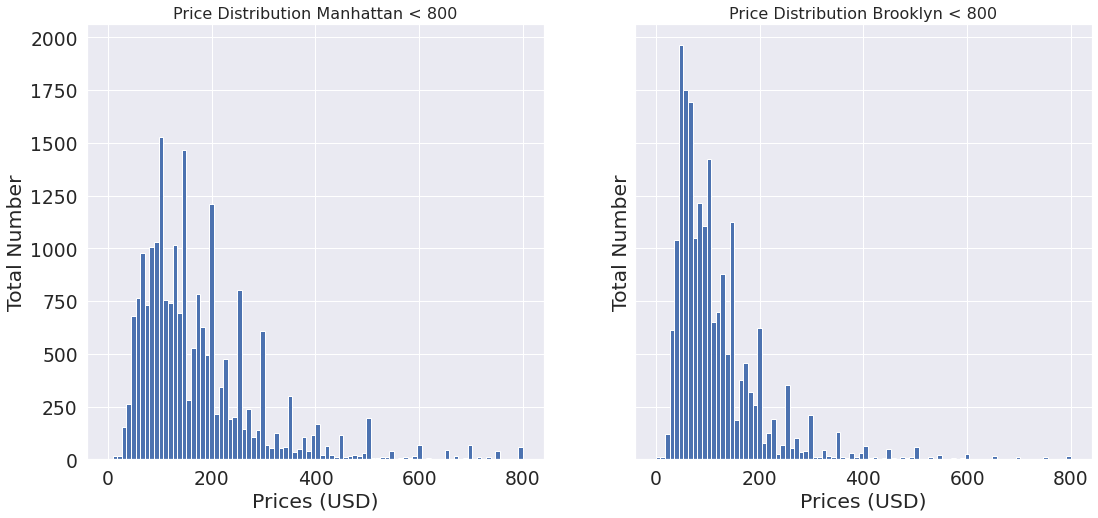

In [0]:
fig, axes = plt.subplots(1,2, sharey= True, figsize = (18,8) )
axes[0].set_title("Price Distribution Manhattan < 800", fontsize = 16)
axes[0].set_xlabel("Prices (USD)")
axes[0].set_ylabel("Total Number")
axes[0].hist(Airbnb_data_2019[Airbnb_data_2019['neighbourhood_group']== "Manhattan"].price, bins=90, range=(0, 800) )
axes[1].set_title("Price Distribution Brooklyn < 800", fontsize = 16)
axes[1].set_xlabel("Prices (USD)")
axes[1].set_ylabel("Total Number")
axes[1].hist(Airbnb_data_2019[Airbnb_data_2019['neighbourhood_group']== "Brooklyn"].price, bins=90, range=(0, 800) )

**According to the New York Times, Manhattan the most expensive place in New York you can rent just 277 square feet with $1,500 a month("International rents per Square foot," 2017). Hence, we are waiting for a higher cost than other neighbourhood groups. Since demand supply equilibrium will result in a higher cost in Brooklyn. We want to see the distribution of prices for Airbnb in both neighbourhood groups. As it can be indicated, Manhattan has a higher average cost than the Brooklyn.**

**Here in the below table, we want to depict the options which are having top prices in each neighbourhood groups**

In [0]:
df=Airbnb_data_2019[['id', 'name','neighbourhood','neighbourhood_group','price']]
m=df.query('neighbourhood_group=="Manhattan"').price.max();bx=df.query('neighbourhood_group=="Bronx"').price.max();bk=df.query('neighbourhood_group=="Brooklyn"').price.max();qu=df.query('neighbourhood_group=="Queens"').price.max();st=df.query('neighbourhood_group=="Staten Island"').price.max()

df1=df.query('neighbourhood_group=="Manhattan"');filtered_data1 = df1[df1["price"]==m]
df2=df.query('neighbourhood_group=="Bronx"');filtered_data2 = df2[df2["price"]==bx]
df3=df.query('neighbourhood_group=="Brooklyn"');filtered_data3 = df3[df3["price"]==bk]
df4=df.query('neighbourhood_group=="Queens"');filtered_data4 = df4[df4["price"]==qu]
df5=df.query('neighbourhood_group=="Staten Island"');filtered_data5 = df5[df5["price"]==st]
frames = [filtered_data1, filtered_data2,filtered_data3,filtered_data4,filtered_data5]
result = pd.concat(frames)
result=result.reset_index()
#print(result.to_string())
print("Top price places in Each Neighbourhood Groups\n")
result.head()

Top price places in Each Neighbourhood Groups



index        id  ... neighbourhood_group  price
0  29238  22436899  ...           Manhattan  10000
1  24477  19698169  ...               Bronx   2500
2  17692  13894339  ...            Brooklyn  10000
3   9151   7003697  ...              Queens  10000
4  22353  18051877  ...       Staten Island   5000

[5 rows x 6 columns]

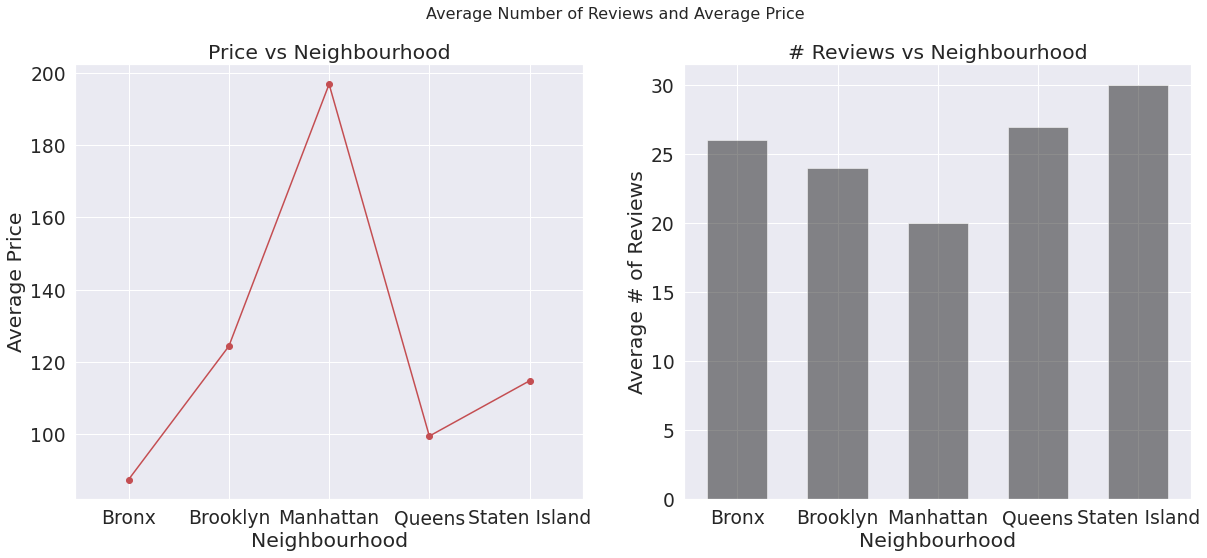

In [0]:
prices=Airbnb_data_2019.groupby('neighbourhood_group').mean().price
price_range=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
number_review=Airbnb_data_2019.groupby('neighbourhood_group').mean().number_of_reviews.astype(int)
fig, axes = plt.subplots(1, 2 , sharex= True ,sharey= False, figsize = (20,8))
axes[0].plot(price_range, prices, color='r',marker='o') 
axes[0].set_xlabel('Neighbourhood');axes[1].set_xlabel('Neighbourhood')
axes[0].set_ylabel('Average Price');axes[1].set_ylabel('Average # of Reviews')
axes[0].set_title('Price vs Neighbourhood');axes[1].set_title('# Reviews vs Neighbourhood')
axes[1].bar(price_range,number_review,color='k',alpha=0.5,width=0.6,bottom=None, align='center')

fig.suptitle("Average Number of Reviews and Average Price", fontsize = 16);

**Here, we want to see if there is relationship between the average price and and average number of reviews in each neighbourhood without using any machine learning algorithms. We think we will see a lading from Manhattan in average number of reviews but Staten Island was the leading neighbourhood. It is mainly related to number of options since Manhattan's possible option is 21661. However, Staten Island has only 373 options. Since we are checking the average number of reviews, it is quıte sensible for Staten Island to lead average number of reviews.**

**We can also see that Brooklyn is having more average number of reviews than Manhattan, although the difference of available option is only 1557. So, for this case we analyze that every user of Airbnb in Manhattan is not giving a review as much as other neighbourhood groups.**

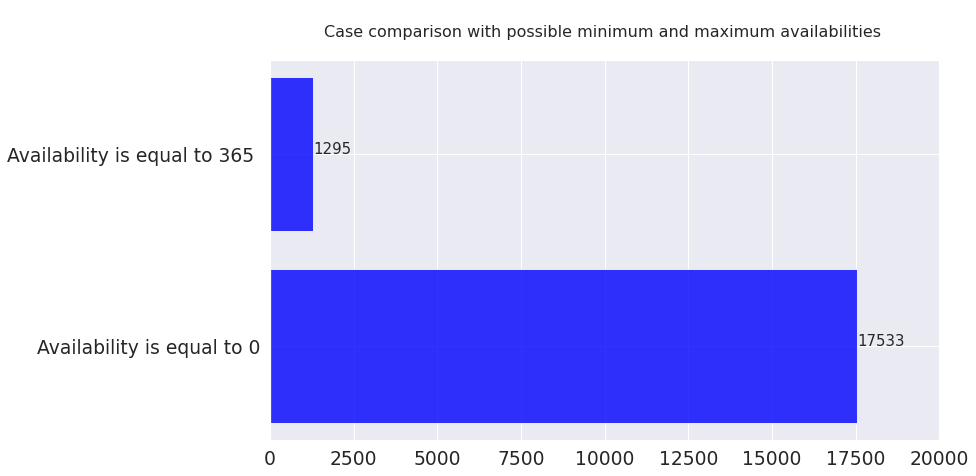

In [0]:
Barh_points = ["Availability is equal to 0", "Availability is equal to 365 "]
Barh_data = [Airbnb_data_2019[Airbnb_data_2019["availability_365"]== 0].shape[0],Airbnb_data_2019[Airbnb_data_2019["availability_365"]== 365].shape[0]]

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size


plt.barh(Barh_points, Barh_data, color = "blue", alpha = 0.8 )
plt.title("\nCase comparison with possible minimum and maximum availabilities \n", fontsize = 16)
plt.xticks([0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000])
for index, value in enumerate(Barh_data):
    plt.text(value, index, str(value), fontsize = 15)
plt.show()

**By checking the availability option for extreme cases which are having 365 available option or 0. By depicting in the horizontal bar, we see that there more than 15000 options which are not available during a year. So we come uo with the idea that, there is a missing input entry for available options at least for some cases which lead to a wrong approachment for the availablity.**

**Here in the below table, we want to depict the top number of reviewed places in each neighbourhood groups**

In [0]:
df=Airbnb_data_2019[['id', 'name','neighbourhood','neighbourhood_group','number_of_reviews']]
m=df.query('neighbourhood_group=="Manhattan"').number_of_reviews.max();bx=df.query('neighbourhood_group=="Bronx"').number_of_reviews.max();bk=df.query('neighbourhood_group=="Brooklyn"').number_of_reviews.max();qu=df.query('neighbourhood_group=="Queens"').number_of_reviews.max();st=df.query('neighbourhood_group=="Staten Island"').number_of_reviews.max()

df1=df.query('neighbourhood_group=="Manhattan"');filtered_data1 = df1[df1["number_of_reviews"]==m]
df2=df.query('neighbourhood_group=="Bronx"');filtered_data2 = df2[df2["number_of_reviews"]==bx]
df3=df.query('neighbourhood_group=="Brooklyn"');filtered_data3 = df3[df3["number_of_reviews"]==bk]
df4=df.query('neighbourhood_group=="Queens"');filtered_data4 = df4[df4["number_of_reviews"]==qu]
df5=df.query('neighbourhood_group=="Staten Island"');filtered_data5 = df5[df5["number_of_reviews"]==st]
frames = [filtered_data1, filtered_data2,filtered_data3,filtered_data4,filtered_data5]
result = pd.concat(frames)
result=result.reset_index()
#print(result.to_string())
print("Top Number of Reviews places in Each Neighbourhood Groups\n")
result.head()

Top Number of Reviews places in Each Neighbourhood Groups



index       id  ... neighbourhood_group number_of_reviews
0   2031   903972  ...           Manhattan               607
1   5260  3802218  ...               Bronx               321
2   4870  3474320  ...            Brooklyn               488
3  11759  9145202  ...              Queens               629
4    256    63320  ...       Staten Island               333

[5 rows x 6 columns]

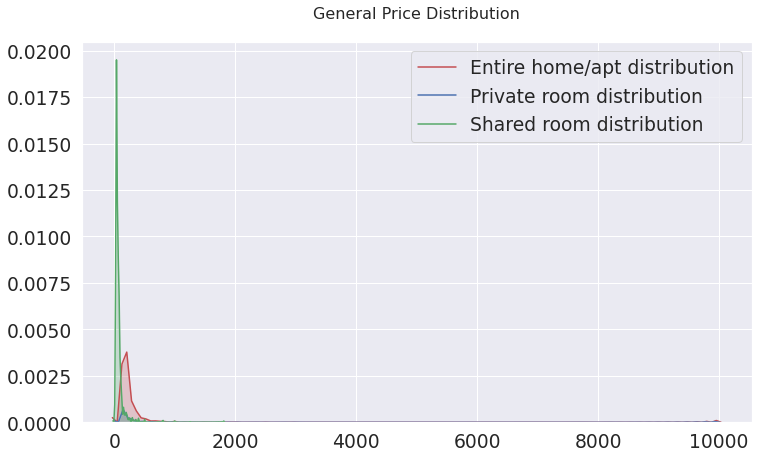

In [0]:
keypoint = "price"
Entire = Airbnb_data_2019[Airbnb_data_2019["room_type"]== "Entire home/apt"][keypoint]
Private_room = Airbnb_data_2019[Airbnb_data_2019["room_type"]== "Private room"][keypoint]
Shared_Room = Airbnb_data_2019[Airbnb_data_2019["room_type"]== "Shared room"][keypoint]
plt.title("General Price Distribution\n" , fontsize = 16)
sns.kdeplot(Entire, shade = True, label="Entire home/apt distribution",  color="r")
sns.kdeplot(Private_room, shade = True, label="Private room distribution",  color="b")
sns.kdeplot(Shared_Room, shade = True, label="Shared room distribution",  color="g")

**In this graph, we want to show the general distribution with having all the possible prices. We can see that by checking the peak points average price distribution is as follows;**

**Entire home/apt > Private room > Shared room**

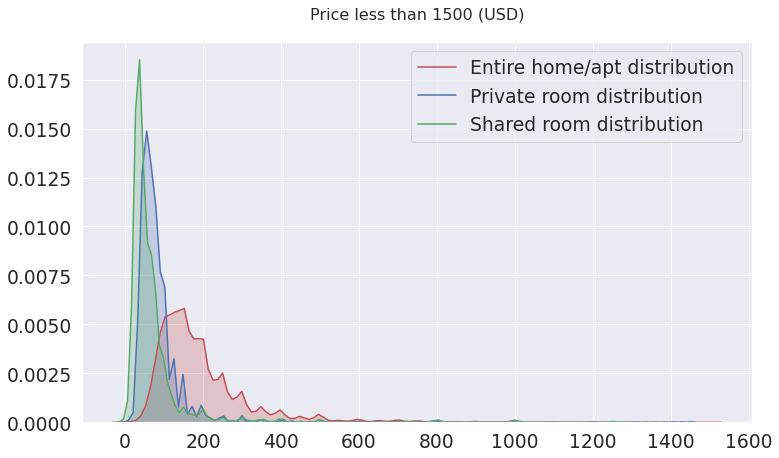

In [0]:
Entire = Entire[Entire < 1500]
Private_room = Private_room[Private_room < 1500]
Shared_Room = Shared_Room[Shared_Room < 1500]
plt.title("Price less than 1500 (USD)\n" , fontsize = 16)
sns.kdeplot(Entire, shade = True, label="Entire home/apt distribution",  color="r")
sns.kdeplot(Private_room, shade = True, label="Private room distribution",  color="b")
sns.kdeplot(Shared_Room, shade = True, label="Shared room distribution",  color="g")


**By having a boundary price for the distribution we want to see the deviations of prices for each cases. As it can be seen, Entire home/apt is more costly than other options. I t is mainly related to area size and other parameters. In addition to that, we were not expecting a price for Shared room option more than 400 dollars since it is not a secure option for most of the people. However, there are some people who can pay more than 400 dollars for a private room in Airbnb which is a quite interesting result.**

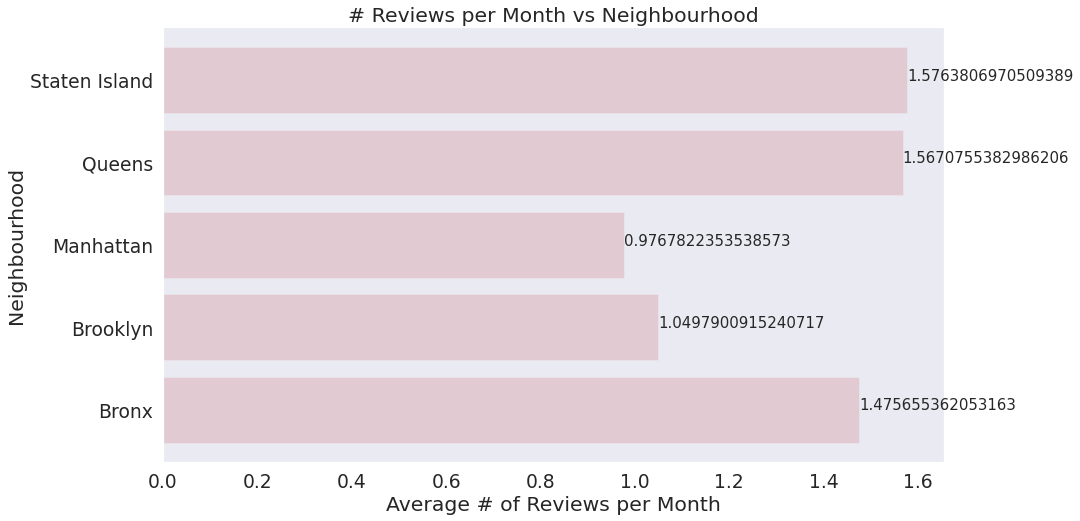

In [0]:
ng_range=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
review_pm=Airbnb_data_2019.groupby('neighbourhood_group').mean().reviews_per_month

fig, axes = plt.subplots(1, 1 , sharex= True ,sharey= False, figsize = (14,8))
axes.barh(ng_range,review_pm,color='r',alpha=0.2, align='center')
axes.set_title('# Reviews per Month vs Neighbourhood')
axes.set_ylabel('Neighbourhood');axes.set_xlabel('Average # of Reviews per Month')
for index, value in enumerate(review_pm):
    plt.text(value, index, str(value), fontsize = 15)
plt.grid()
plt.show();

**By analyzing the average number of reviews per month we want to see whether we are going to have the same result as we had in average number of reviews chart. Hence, we did not suprise with the result which is led by Staten Island and the least average number of reviews came from the Manhattan. However, interesting outcome in this case is that Brooklyn is more closer to Manhattan in the average than in the than it was in the average number of reviews graph.**

#### **2. Some statistical tests**


**In the below contingency table we want to check a specific correlation if there is for room_type and neighbourhood_group**

In [0]:
contingency_table = pd.crosstab(Airbnb_data_2019['room_type'], Airbnb_data_2019['neighbourhood_group'])
contingency_table

neighbourhood_group  Bronx  Brooklyn  Manhattan  Queens  Staten Island
room_type                                                             
Entire home/apt        379      9559      13199    2096            176
Private room           652     10132       7982    3372            188
Shared room             60       413        480     198              9

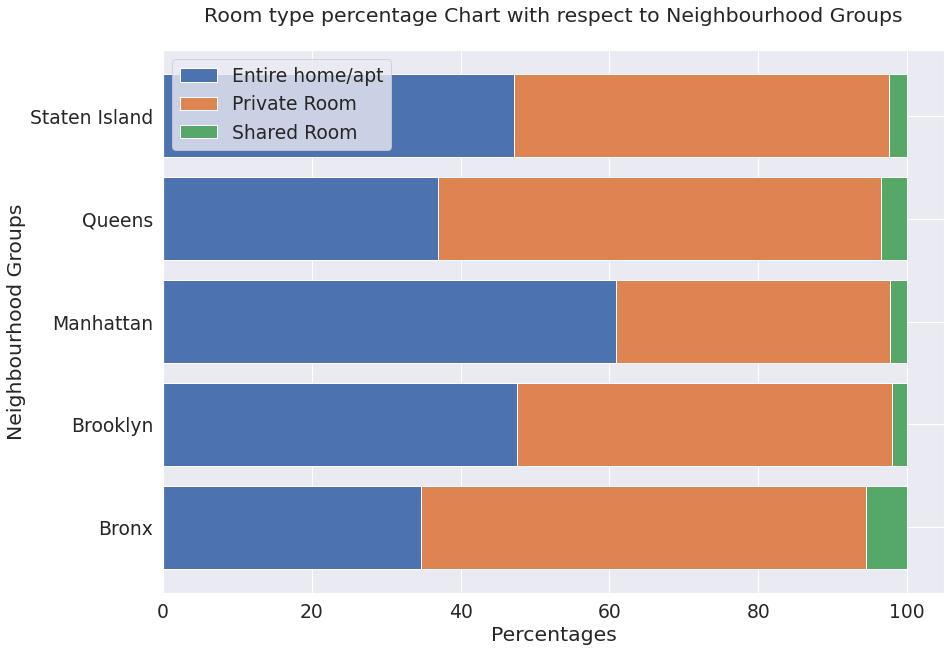

In [0]:
Entire_home_count = contingency_table.iloc[0][0:5].values
Private_count = contingency_table.iloc[1][0:5].values
Shared_count = contingency_table.iloc[2][0:5].values

total = Entire_home_count + Private_count + Shared_count

proportion_entire = np.true_divide(Entire_home_count, total) * 100
proportion_private = np.true_divide(Private_count, total) * 100
proportion_shared = np.true_divide(Shared_count, total) * 100

fig = plt.figure(figsize=(14, 10))
sns.set(font_scale= 1.7)

categories = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]

ax1 = plt.barh(categories, proportion_entire, left = 0, edgecolor='white', label='Entire home/apt')

ax2 = plt.barh(categories, proportion_private, left = proportion_entire ,edgecolor='white', label='Private Room')

ax3 = plt.barh(categories, proportion_shared, left = proportion_entire + proportion_private, edgecolor='white', label='Shared Room')


plt.legend()
plt.xlabel("Percentages")
plt.ylabel("Neighbourhood Groups")
plt.title("Room type percentage Chart with respect to Neighbourhood Groups\n")
plt.show()

**By having the percentage distribution with respect to neighbourhood groups we want to analyze do we have a chance to realize a correlation by just checking a stacked chart.**

In the following test, our hypothesis setting is the following:

$H_0$: `Room Type` and `Neighbourhood Group` are independent variables.

$H_A$: `Room Type` and `Neighobourhood Group` are **not** independent variables.




In [0]:
stats.chi2_contingency(contingency_table)

(1559.5803491465442,
 0.0,
 8,
 array([[5.66954065e+02, 1.04473369e+04, 1.12564546e+04, 2.94441955e+03,
         1.93834891e+02],
        [4.98162716e+02, 9.17970966e+03, 9.89065315e+03, 2.58715852e+03,
         1.70315942e+02],
        [2.58832191e+01, 4.76953472e+02, 5.13892218e+02, 1.34421925e+02,
         8.84916658e+00]]))

**By having the chi-square test we come up with a p-value which resulted as 0. So that, we can say that these aforementioned variables are not independent. Further research can be done to confirm the result with another staticstics test.**

**Pearson correlations**

**a. Between price and number_of_reviews**

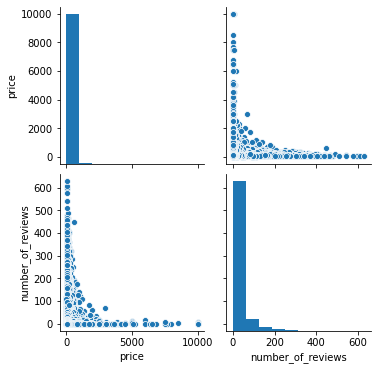

In [0]:
cols = ["price", "number_of_reviews"]

sns.pairplot(data=Airbnb_data_2019, vars=cols)

In [0]:
stats.pearsonr(Airbnb_data_2019["price"], Airbnb_data_2019["number_of_reviews"])

(-0.04795422658266221, 2.689737394103427e-26)

From the pearson test, correlation coefficient resulted negative with being very close to 0. Hence, we can say there is no linear correlation between price and number of reviews. Hence, from the graphs, it seems there is a power correlation between price and number of reviews. It can be further analyzed.

**b. Between price and minimum_nights**

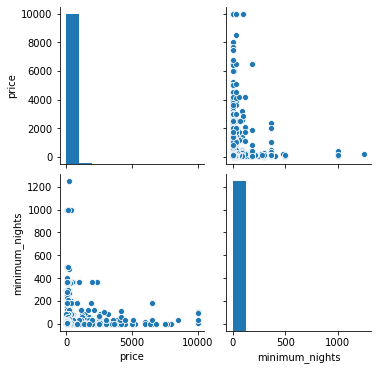

In [0]:
cols = ["price", "minimum_nights"]

sns.pairplot(data=Airbnb_data_2019, vars=cols)

In [0]:
stats.pearsonr(Airbnb_data_2019["price"], Airbnb_data_2019["minimum_nights"])

(0.04279933414330346, 2.8531707312205514e-21)

From the pearson test, correlation coefficient resulted positive with being very close to 0. Hence, we can say there is no linear correlation between price and minimum nights. Whether there is a relation between price and minimum nigts or not can be further analyzed but we know if there is a relation it is no linear.

**c. Between minimum_nights and number_of_reviews**

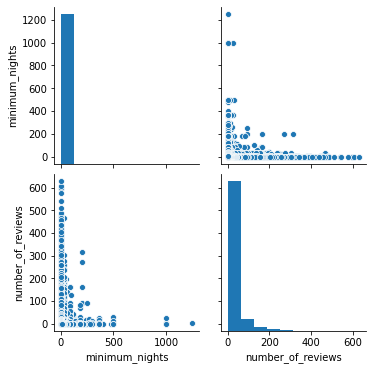

In [0]:
cols = ["minimum_nights", "number_of_reviews"]

sns.pairplot(data=Airbnb_data_2019, vars=cols)

In [0]:
stats.pearsonr(Airbnb_data_2019["minimum_nights"], Airbnb_data_2019["number_of_reviews"])

(-0.08011606824164458, 1.934672598704503e-70)

From the pearson test, correlation coefficient resulted positive with being very close to 0. Hence, we can say there is no linear correlation between minimum nights and number of reviews. Hence, from the graphs we know if there is a relation it is no linear. Whether there is a relation between price and minimum nigts or not can be further analyzed but from the graphs as an insight firstly power relation should be analyzed.

**d. Between number_of_reviews and calculated_host_listings_count**

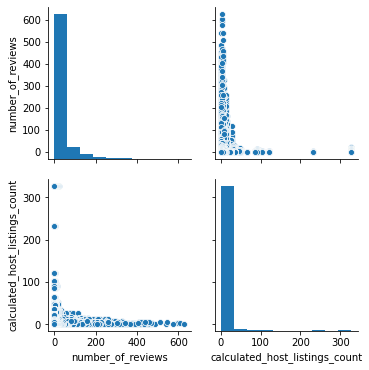

In [0]:
cols = ["number_of_reviews", "calculated_host_listings_count"]

sns.pairplot(data=Airbnb_data_2019, vars=cols)

In [0]:
stats.pearsonr(Airbnb_data_2019["number_of_reviews"], Airbnb_data_2019["calculated_host_listings_count"])

(-0.07237606054177578, 8.610141696001442e-58)

Having a negative correlation coefficient which is very close to 0, we can result with no linear correlation between number of reviews and calculated host listings count. Power relation can be analyzed with another correlation test since from the graphs, it seems there might be a relation caused by a power relation. But from the result of the pearson test we know if there is a correlation, it is not a linear correlation.

**c) T-test about availability**

Our objective is to check if there is any statistically significant difference between the avarage of the availabilities (named as `"availability_365"` in the dataset) Airbnb 2019. Below, you may find the hypothesis setting.

$\mu_{Manhattan}$: average of the availability of Manhattan 

$\mu_{others}$: average of the availability of other neighbourhood groups

$H_0: \mu_{Manhattan} = \mu_{others}$  
$H_A: \mu_{Manhattan} \neq \mu_{others}$

In [0]:
Manhattan_ttestdata_test = Airbnb_data_2019[Airbnb_data_2019["neighbourhood_group"] == "Manhattan"]["availability_365"]  
Others_ttestdata_test = Airbnb_data_2019[Airbnb_data_2019["neighbourhood_group"] != "Manhattan"]["availability_365"] 
print("Mean of availability in Manhattan is equal to: ", Manhattan_ttestdata_test.mean())
print("Mean of availability in other neighbourhood groups is equal to: ", Others_ttestdata_test.mean())

Mean of availability in Manhattan is equal to:  111.97940999953835
Mean of availability in other neighbourhood groups is equal to:  113.41914518616436


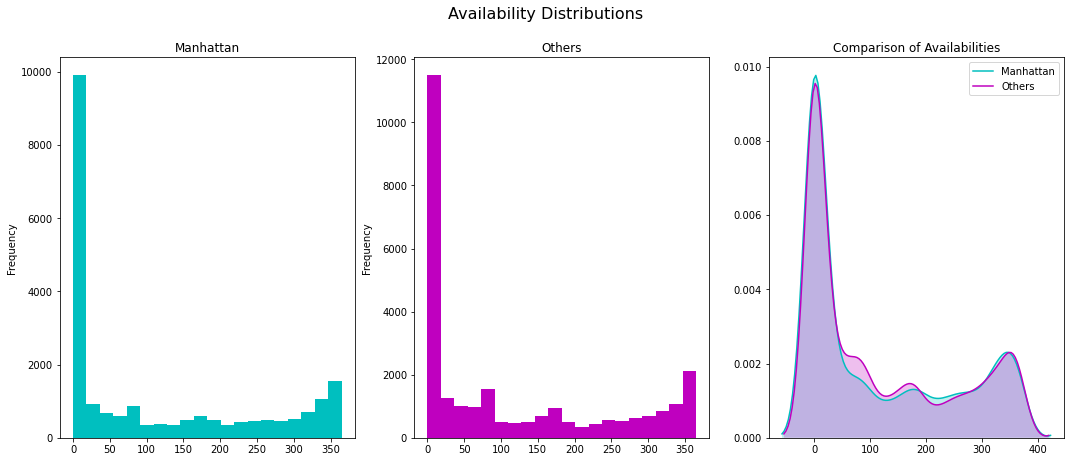

In [0]:
fig, ax = plt.subplots(1, 3, figsize=(18,7))  
                                                      
Manhattan_ttestdata_test.plot(kind="hist", ax=ax[0], bins=20, label="Manhattan", color="c")
ax[0].set_title("Manhattan")

Others_ttestdata_test.plot(kind="hist", ax=ax[1], bins=20, label="Others", color="m")
ax[1].set_title("Others")

sns.kdeplot(Manhattan_ttestdata_test, shade=True, label="Manhattan", ax=ax[2], color="c")
sns.kdeplot(Others_ttestdata_test, shade=True, label="Others", ax=ax[2], color="m")
ax[2].set_title("Comparison of Availabilities")

plt.suptitle("Availability Distributions", fontsize = 16)
plt.show()

In [0]:
stats.ttest_ind(Manhattan_ttestdata_test, Others_ttestdata_test, equal_var=False)

Ttest_indResult(statistic=-1.1995078252765838, pvalue=0.23033670197191253)

**Since p-value is more than the significance level, which is 0.05, we can accept the null hypothesis test**

**Hence, we accept null hypothesis about availability which is** $H_0: \mu_{Manhattan} = \mu_{others}$ 

#### **3. Visualizing the Airbnb dataset in the map by using heatmap**


In [0]:
def location(row_wise):
  start = (row_wise['latitude'], row_wise['longitude'])
  return start

Airbnb_data_2019['latitude'] = Airbnb_data_2019['latitude'].astype(float)
Airbnb_data_2019['longitude'] = Airbnb_data_2019['longitude'].astype(float)

locations = Airbnb_data_2019.apply(location,axis=1)
locations = set(locations)

normal_map = folium.Map(location=[40.730610,-73.935242], zoom_start = 11)
HeatMap(locations).add_to(normal_map)

normal_map

**By using the HeatMap, we want to show the density of available options in the AirBnb list. As it can be seen the colour of red is getting more intense especially in main streets of Brooklyn and Manhattan. To be more specific, especially the streets of Manhattan which are linked to 5th Avenue and Times Square and close to Wall Street are having an intense red colour. So, we can analyze further with a HeatMap that people are mostly preferring these locations for their closeness to mainstream of economic capital and shopping options and for its well-known prestige.**

### **ii. New York Hotels Data**


#### **1. Visualizations**


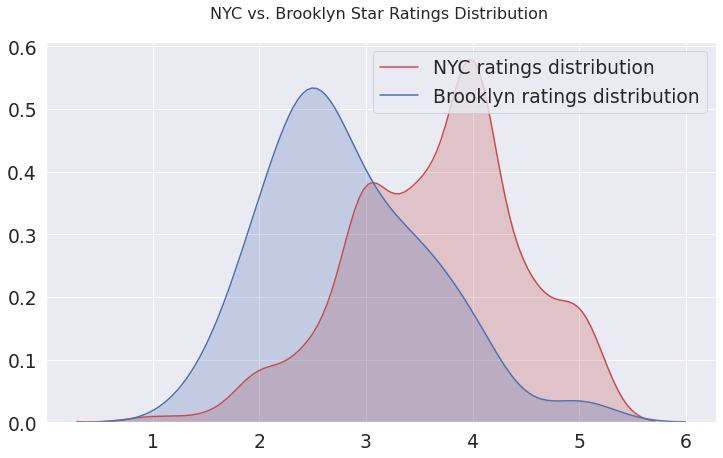

In [0]:
keypoint = "star_rating"
NYC = New_York_Hotels[New_York_Hotels["city"]== "New York"][keypoint]
Brooklyn = New_York_Hotels[New_York_Hotels["city"]== "Brooklyn"][keypoint]

plt.title("NYC vs. Brooklyn Star Ratings Distribution \n", fontsize = 16)
sns.kdeplot(NYC, shade=True, label="NYC ratings distribution",  color="r")
sns.kdeplot(Brooklyn, shade=True, label="Brooklyn ratings distribution",  color="b")

**This graph represents the star rating distribution in NYC with Brooklyn and compare it with each other. As it's seen from the graph that what NYC overall star rating distribution and Brooklyn star rating distribution have in common is the rating around 3 stars. Brooklyn is in advance with 4 stars average whereas NYC overall has 2.5 stars average. It wouldn't be irrational to say when the average NYC star rating is considered Brooklyn is the borough that pulls up the average.**

Text(0.5, 1.0, 'Star Rating Distributions General')

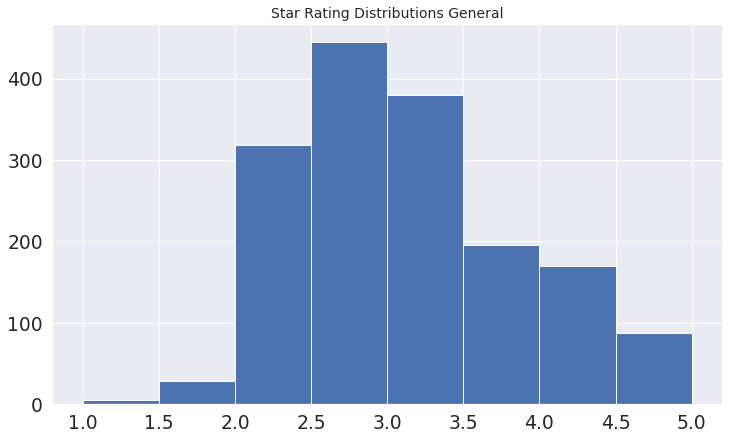

In [0]:
plt.hist(New_York_Hotels.star_rating, bins = 8)
plt.title("Star Rating Distributions General", fontsize =14)

**What graph here shows that general star rating distribution in NYC clustered around 3. Interpretation of this visualization would be the inference that there is a worthwhile probability that coming acroos a decent hotel in New York**

In [0]:
def location(row_wise):
  start = (row_wise['latitude'], row_wise['longitude'])
  return start

New_York_Hotels['latitude'] = New_York_Hotels['latitude'].astype(float)
New_York_Hotels['longitude'] = New_York_Hotels['longitude'].astype(float)

locations = New_York_Hotels.apply(location,axis=1)
locations = set(locations)

normal_map = folium.Map(location=[40.730610,-73.935242], zoom_start = 11, prefer_canvas = True)

for location in locations:
  folium.CircleMarker(location = location, color='green',
    fill=True,
    fill_color='#3186cc').add_to(normal_map)

normal_map

**This map here reveals that  hotel intensity in NYC mostly piles in the area where Manhattan then Brooklyn lies respectively. It is logical the say that Manhattan and Brooklyn characterized as a centre of the NYC. More than that by taking into consideration the other datasets and results it wouldn't be a contradiction to say that Manhattan and Brooklyn are prominent for NYC.**

#### **2. Hypothesis testings**


**a) Pearson correlation test between high_rate and low_rate**

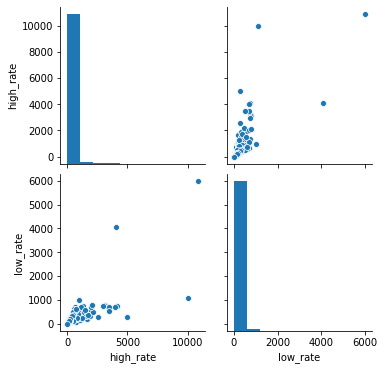

In [0]:
cols = ["high_rate", "low_rate"]

sns.pairplot(data=New_York_Hotels, vars=cols)

In [0]:
stats.pearsonr(New_York_Hotels["high_rate"], New_York_Hotels["low_rate"])

(0.7652792424347624, 8.8527221675e-314)

From the pearson correlation test, we can see that there is a linear correlation in which the correlation coefficient is more than 0.75. Hence, we can sey there is a strong linear correlation between high_rate and low_rate in the New York Hotels dataset.

**b) T-test for star rating between New York City and others**

Our objective is to check if there is any statistically significant difference between the star ratings (named as `"star_rating"` in the dataset) of NYC and non-NYC Hotels. Below, you may find the hypothesis setting.

$\mu_{NYC}$: average of the Star rating of NYC Hotels 

$\mu_{non-NYC}$: average of the star rating of non-NYC Hotels

$H_0: \mu_{NYC} = \mu_{non-NYC}$  
$H_A: \mu_{NYC} \neq \mu_{non-NYC}$

In [0]:
NYC_Hotels_test = New_York_Hotels[New_York_Hotels["city"] == "New York"]["star_rating"]  
Non_NYC_Hotels_test = New_York_Hotels[New_York_Hotels["city"] != "New York"]["star_rating"] 

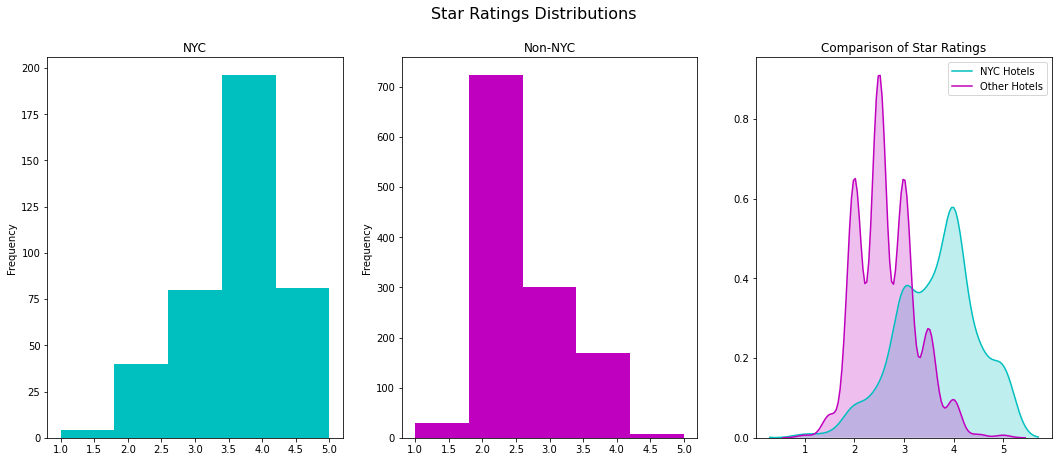

In [0]:
fig, ax = plt.subplots(1, 3, figsize=(18,7))  
                                                      
NYC_Hotels_test.plot(kind="hist", ax=ax[0], bins=5, label="NYC_Hotels", color="c")
ax[0].set_title("NYC")

Non_NYC_Hotels_test.plot(kind="hist", ax=ax[1], bins=5, label="other_hotels", color="m")
ax[1].set_title("Non-NYC")

sns.kdeplot(NYC_Hotels_test, shade=True, label="NYC Hotels", ax=ax[2], color="c")
sns.kdeplot(Non_NYC_Hotels_test, shade=True, label="Other Hotels", ax=ax[2], color="m")
ax[2].set_title("Comparison of Star Ratings")

plt.suptitle("Star Ratings Distributions", fontsize = 16)
plt.show()

In [0]:
stats.ttest_ind(NYC_Hotels_test, Non_NYC_Hotels_test, equal_var=False)

Ttest_indResult(statistic=23.74685339478312, pvalue=3.150079117812596e-86)

**Since p-value is less than the significance level, which is 0.05, we can reject the null hypothesis test**

**Hence, we can accept out alternate hypothesis about star rating which is $H_A: \mu_{NYC} \neq \mu_{non-NYC}$**

#### **3. Heatmap of New York Hotels**


In [0]:
def location(row_wise):
  start = (row_wise['latitude'], row_wise['longitude'])
  return start

New_York_Hotels['latitude'] = New_York_Hotels['latitude'].astype(float)
New_York_Hotels['longitude'] = New_York_Hotels['longitude'].astype(float)


locations = New_York_Hotels.apply(location,axis=1)
locations = set(locations)

normal_map = folium.Map(location=[40.730610,-73.935242], zoom_start = 11)
HeatMap(locations).add_to(normal_map)


normal_map

**This heat map demonstrates the role that Manhattan and Brooklyn have. As it can be seen from the heatmap Queens and Bronx also have a considerable amount of hotels however when it is compared to Manhattan and Brooklyn it is a trace of by far. Once more again it is accurate to say Manhattan and Brooklyn are the spirits and pioneers of the NYC proving that the heat intensity according to map**

### **iii. Pubs and Bars in New York Data**


#### **1. Visualization with respect to Borough**


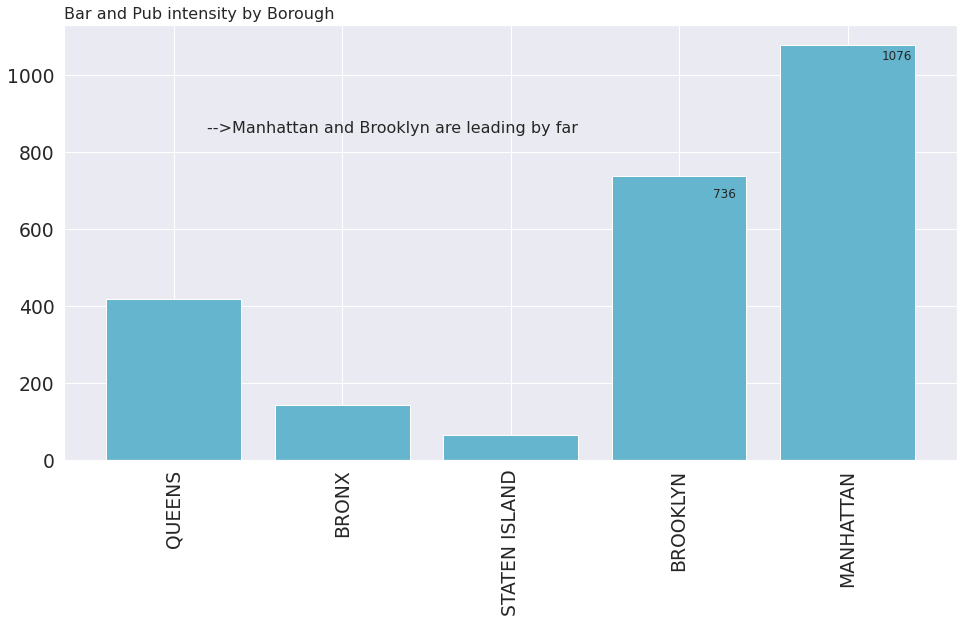

In [0]:
Pubs_and_Bars_in_NYC.drop(Pubs_and_Bars_in_NYC[ Pubs_and_Bars_in_NYC['Borough'] == 'Unspecified' ].index , inplace=True)
Pubs_and_Bars_in_NYC.isnull().sum()
fig, axes = plt.subplots(1, 1 , sharex= False ,sharey= False, figsize = (16,8))
axes.set_title("Bar and Pub intensity by Borough",fontsize = 16,loc='left')

Pubs_and_Bars_in_NYC['Borough'].value_counts(sort=False).plot.bar(align='center',width=0.8,color='c')

plt.text(0.2,850,'-->Manhattan and Brooklyn are leading by far',fontsize=16)
c1=Pubs_and_Bars_in_NYC.query('Borough == "MANHATTAN"').Borough.count();c2=Pubs_and_Bars_in_NYC.query('Borough == "BROOKLYN"').Borough.count()

plt.text(4.2,1040,c1,fontsize=12);plt.text(3.2, 680,c2,fontsize=12);

**As stated before Manhattan and Brookyln are leading respectively again aslo in the course of Bars and Pubs dataset. Manhattan is beyond the Brooklyn this can be commented as Manhattan is considered to be the center of the city and contains the business and entertainment sectors in itself.**

#### **2. Heatmap of Pubs and Bars in New York**


In [0]:
def location(row_wise):
  start = (row_wise['Latitude'], row_wise['Longitude'])
  return start

Pubs_and_Bars_in_NYC['Latitude'] = Pubs_and_Bars_in_NYC['Latitude'].astype(float)
Pubs_and_Bars_in_NYC['Longitude'] = Pubs_and_Bars_in_NYC['Longitude'].astype(float)

locations = Pubs_and_Bars_in_NYC.apply(location,axis=1)
locations = set(locations)

normal_map = folium.Map(location=[40.730610,-73.935242], zoom_start = 11)
HeatMap(locations).add_to(normal_map)

normal_map

**Here in this heatmap in contrast to NYC hotel dataset also Queens has a prominent factor. Already known that Manhattan and Brooklyn is the crowdest and the most popular places in NYC addition to that Queens here promote entertainment with a neat quantity of bars and pubs. Last bu not least it is convenient to deduce that places with higher intensity of hotel and Airbnb also has the most place in entertainment and service industry.**

### **iv. Party Places in New York Data**


#### **1. Visualizations and a hypothesis test about numbers of complaints**


**First let's try to do a contingency table to perform a chi square hypothesis test**

In [0]:
a= Party_places_in_newyork[Party_places_in_newyork['City'] == "NEW YORK"]
b = Party_places_in_newyork[Party_places_in_newyork['City'] == "BROOKLYN"]
c = Party_places_in_newyork[Party_places_in_newyork['City'] == "BRONX"]
d = Party_places_in_newyork[Party_places_in_newyork['City'] == "STATEN ISLAND"]
e = Party_places_in_newyork[Party_places_in_newyork['City'] == "QUEENS"]
datasets = [a,b,c,d,e]
result = pd.concat(datasets)
contingency_table2 = pd.crosstab(result['Location Type'], result['City'])
contingency_table2

City                        BRONX  BROOKLYN  NEW YORK  QUEENS  STATEN ISLAND
Location Type                                                               
Club/Bar/Restaurant          1026      5175      6251       4            452
House of Worship               79       290       112       0              3
Park/Playground               540      1038       989       0             25
Residential Building/House  35828     44581     31792      11           4226
Store/Commercial             1265      6463      7232       0            261
Street/Sidewalk              8858     11214     17457       9            435

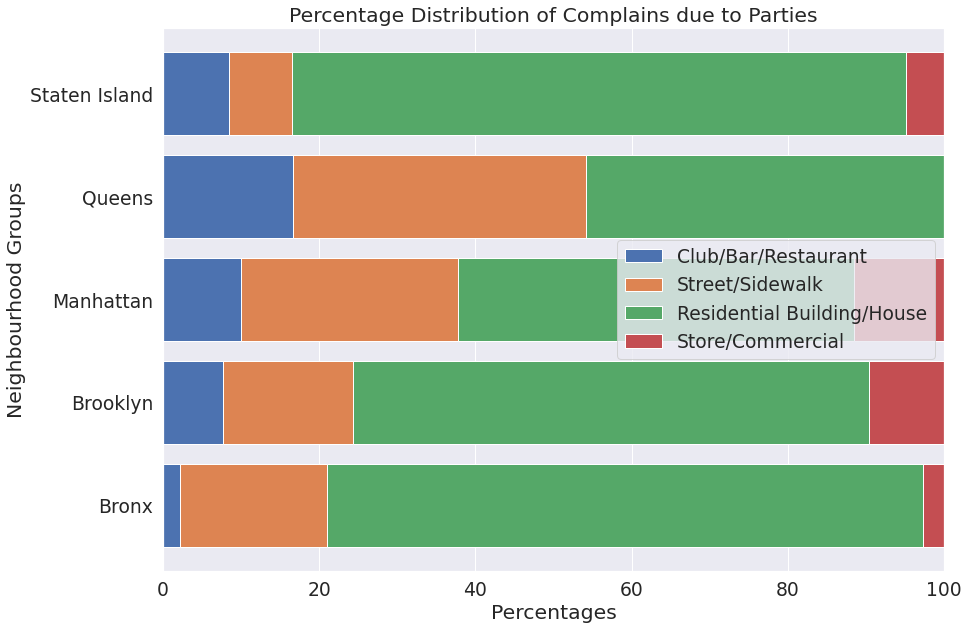

In [0]:
Club_count = contingency_table2.iloc[0][0:5].values
Street_count = contingency_table2.iloc[5][0:5].values
Building_count = contingency_table2.iloc[3][0:5].values
Store_count = contingency_table2.iloc[4][0:5].values

total2 = Club_count + Street_count + Building_count + Store_count

proportion_club = np.true_divide(Club_count, total2) * 100
proportion_street = np.true_divide(Street_count, total2) * 100
proportion_building = np.true_divide(Building_count, total2) * 100
proportion_store = np.true_divide(Store_count, total2) * 100

fig = plt.figure(figsize=(14, 10))
sns.set(font_scale= 1.7)

categories = ["Bronx","Brooklyn","Manhattan","Queens","Staten Island"]

ax1 = plt.barh(categories, proportion_club, left = 0, edgecolor='white', label='Club/Bar/Restaurant')

ax2 = plt.barh(categories, proportion_street, left = proportion_club ,edgecolor='white', label='Street/Sidewalk')

ax3 = plt.barh(categories, proportion_building, left = proportion_club + proportion_street, edgecolor='white', label='Residential Building/House')

ax4 = plt.barh(categories, proportion_store, left = proportion_club + proportion_street + proportion_building , edgecolor='white', label='Store/Commercial')
plt.legend()

plt.xlabel("Percentages")
plt.ylabel("Neighbourhood Groups")
plt.title("Percentage Distribution of Complaints due to Parties")
plt.show()

**Manhattan functions as the heart of the city with the most proportion of nightlife such as clubs, bars, restaurants and pubs. More than that Queens have more complaints in terms of clubs/bars than Manhattan has, to the contrary Manhattan has double amount of entertainment places. Brooklyn and Bronx are the boroughs where people mostly entertain themselves. Also store/commercial rate is remarkable for Manhattan and Brooklyn.**

In the following test, our hypothesis setting is the following:

$H_0$: `Location Type` and `City` are independent variables.

$H_A$: `Location Type` and `City` are **not** independent variables.

In [0]:
stats.chi2_contingency(contingency_table2)

(10994.606358327483,
 0.0,
 20,
 array([[3.30989337e+03, 4.78173750e+03, 4.43903739e+03, 1.66899405e+00,
         3.75662745e+02],
        [1.24108180e+02, 1.79296634e+02, 1.66446707e+02, 6.25808120e-02,
         1.40858978e+01],
        [6.64645462e+02, 9.60200155e+02, 8.91384019e+02, 3.35143522e-01,
         7.54352211e+01],
        [2.98572486e+04, 4.31341766e+04, 4.00428134e+04, 1.50553401e+01,
         3.38870612e+03],
        [3.90299713e+03, 5.63858278e+03, 5.23447382e+03, 1.96806310e+00,
         4.42978202e+02],
        [9.73710730e+03, 1.40670064e+04, 1.30588447e+04, 4.90987846e+00,
         1.10513181e+03]]))

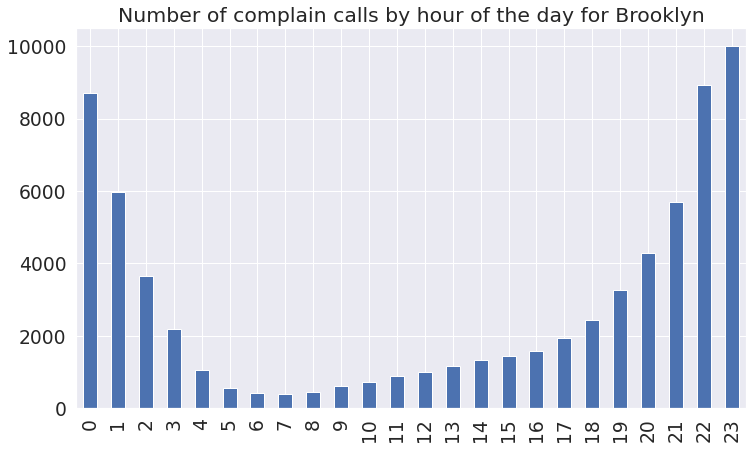

In [0]:
Party_places_in_newyork[Party_places_in_newyork['City']=='BROOKLYN']['complain_hour'].value_counts(sort=False).plot(kind='bar',title= 'Number of complaint calls by hour of the day for Brooklyn')

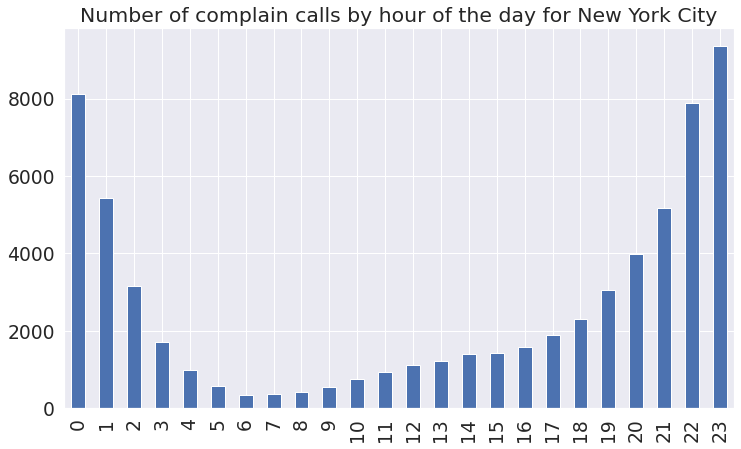

In [0]:
Party_places_in_newyork[Party_places_in_newyork['City']=='NEW YORK']['complain_hour'].value_counts(sort=False).plot(kind='bar',title= 'Number of complaint calls by hour of the day for New York City')

**Observe that between 9pm-2am noise complaints increase in Brooklyn and also NYC city as well. Reason for that is nightlife and entertainment sector occupies a big place in NYC. Also that can be seen from high quantity of clubs/bars/pubs possessed by Manhattan, Brooklyn and Bronx.**

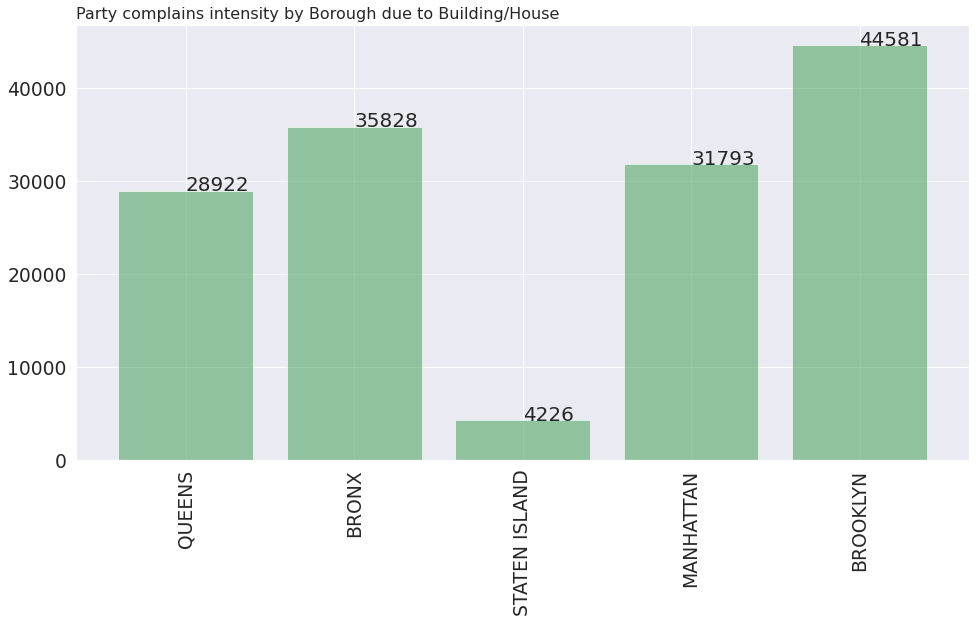

In [0]:

Party_places_in_newyork = Party_places_in_newyork[Party_places_in_newyork['Location Type'] == 'Residential Building/House']
fig, axes = plt.subplots(1, 1 , sharex= False ,sharey= False, figsize = (16,8))
axes.set_title("Party complaints intensity by Borough due to Building/House",fontsize = 16,loc='left')

Party_places_in_newyork['Borough'].value_counts(sort=False).plot.bar(align='center',width=0.8,color='g', alpha = 0.6)
for index, value in enumerate(Party_places_in_newyork['Borough'].value_counts(sort=False)):
    plt.text(index, value, str(value), fontsize = 20)

**As discussed before Brooklyn and Manhattan are the heart of the city and nightlife. However here comes the strange result that despite Manhattan have more quantity of entertainment features in terms of bars, pubs and restaurants however in contradiction Brooklyn has most of the complaints. To this end it is a good point to mention that Brooklyn is more like place that house  or private parties do take place whereas Manhttan is more like outwith street entertainment style.**

#### **2. HeatMap related to the data of Party Places in New York**


In [0]:

def location(row_wise):
  start = (row_wise['Latitude'], row_wise['Longitude'])
  return start

Party_places_in_newyork['Latitude'] = Party_places_in_newyork['Latitude'].astype(float)
Party_places_in_newyork['Longitude'] = Party_places_in_newyork['Longitude'].astype(float)

locations = Party_places_in_newyork.apply(location,axis=1)
locations = set(locations)

normal_map = folium.Map(location=[40.730610,-73.935242], zoom_start = 11)
HeatMap(locations).add_to(normal_map)
normal_map

**This heatmap in contrast to NYC hotel dataset also Queens has a prominent factor it is known that Manhattan and Brooklyn is the crowdest and the most popular places in NYC addition to that Queens here promote entertainment with a neat quantity of bars and pubs. It is right to say that West Side has more density than the East Side with the facts that Manhattan is the leader in entertainment and Queens also has quite amount of clubs/bars/restau**

### **v. Discussion of some Findings from Data Exploration**

We would like to mention a few things that can enhance the general concept of data science and notion of causation&correlation. Remarkably this project shows how data and efficent handling and use of it is beneficial in terms of the technology of the era we are living in. However there are 2 things that could be discussed in order to promote the idea of "**correlation does not imply causation**".
+ **Queens**:

Queens is overshadowed when it is compared to Manhattan and Brooklyn in terms of AirBnb data and NYC Hotels data with complexity and magnitude. On the other hand it looks encouraging with adequate quantity of clubs/bars and also it is leading in the percenatge of entertainment venue.


+ **Bronx**:

Bronx really comes in the last place in all of the graphs and visuals with Hotel and AirBnB data however Bronx in terms of nosie complaints is leading with considersable percentage. That can be interpreted as people preferring Bronx as a place where they can arrange their own party of entertain themselves without any help of other venues or outside places.

To sum up generally most of the assumptions and hypotheses fit with the outcome (graphs/visuals/stats etc.). Nevertheless it would be not feasible to say that hypothesis and first glance always conform to outcome and results one-to-one. For this reason it is right to say "correlation does not imply causation".


Furthermore, there is another interesting fact about the Heatmap relations between Airbnb and New York Hotels data. Due to the size of the Hotels data the comparision of Heatmap with Airbnb data in the correlation of numbers will not be a proper approach. However, we can again see that the density of possible accommodation locations are high in Manhattan in both heatmaps. We can analyze this outcome with the pace of life and excessive options to see and the tendency of searching luxurious life in Manhattan. Party Places data is mainly concerning the party notices and these notices' can vary. However, again when we check the numbers we were waiting that Manhattan would lead. However, Brooklyn is now leading in this aspect. Further research about the reason of the lead can be implemented with having another datasets mainly related to this topic.


## **C. Machine Learning Models**



### **i. Implementation**



#### **1. Correlation Matrix of Airbnb 2019**


**First, we are going the check again the correlation matrix of Airbnb data of 2019 before starting a Machine learning algorithm to give some basic refreshed insight about some relationships in the Airbnb 2019 data.**

In [0]:
Airbnb_data_2019.corr().style.background_gradient(cmap = 'coolwarm')

#### **2. Regression models for price**


**First, we want to evalaute the difference between adding latitude and longitude to the regression test**

**We want to see whether adding latitude and longitude will affect the results positively or not**

**a) Decision Tree Regression**

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

Y = Airbnb_data_2019['price']
X = Airbnb_data_2019[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state = 1)


regression_model = DecisionTreeRegressor( random_state = 1 )
regression_model.fit(X_train, Y_train)
pred_Y= regression_model.predict(X_test)
print("Mean absolute error of test is equal to", mean_absolute_error(Y_test, pred_Y))
pred_Y_train = regression_model.predict(X_train)
print("Mean absolute error of train is equal to", mean_absolute_error(Y_train, pred_Y_train))


mse = mean_squared_error(Y_test, pred_Y)
mae = mean_absolute_error(Y_test, pred_Y)
rmse = np.sqrt(mse)

print("\nFinal results:\n")
print("mean squared error of test: {}".format(mse))
print("mean absolute error: {}".format(mae))
print("root of mean squared error: {}".format(rmse))






Mean absolute error of test is equal to 108.53485992270008
Mean absolute error of train is equal to 26.925936035301813

Final results:

mean squared error of test: 85767.62987752148
mean absolute error: 108.53485992270008
root of mean squared error: 292.86111021697894


**After adding latitude and longitude**

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

Y = Airbnb_data_2019['price']
X = Airbnb_data_2019[['latitude','longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state = 1)


regression_model = DecisionTreeRegressor( random_state = 1 )
regression_model.fit(X_train, Y_train)
pred_Y= regression_model.predict(X_test)
print("Mean absolute error of test is equal to", mean_absolute_error(Y_test, pred_Y))
pred_Y_train = regression_model.predict(X_train)
print("Mean absolute error of train is equal to", mean_absolute_error(Y_train, pred_Y_train))


mse = mean_squared_error(Y_test, pred_Y)
mae = mean_absolute_error(Y_test, pred_Y)
rmse = np.sqrt(mse)

print("\nFinal results:\n")
print("mean squared error of test: {}".format(mse))
print("mean absolute error: {}".format(mae))
print("root of mean squared error: {}".format(rmse))

Mean absolute error of test is equal to 97.22957357603026
Mean absolute error of train is equal to 0.0012782493097453728

Final results:

mean squared error of test: 74751.48747315677
mean absolute error: 97.22957357603026
root of mean squared error: 273.4071825559028


**After adding latitude and longitude it has been resulted with a better mean squared error test and mean absolute error test.**

**Hence, we have seen that adding latitude and longitude is helping our regression models to work better. So that we will continue our further tests with having latitude and longitude.**

**Now, we are going to add neighbourhood group to check if it will affect results positively or not**

In [0]:
def neighbourhood_assigner(name):
  if  name == "Brooklyn":
    return 1
  elif name == "Manhattan":
    return 2
  elif name ==  "Queens":
    return 3
  elif name ==  "Bronx":
    return 4
  else:
    return 5

Airbnb_data_2019["neighbourhood_numeric"] = Airbnb_data_2019["neighbourhood_group"].apply(neighbourhood_assigner)

In [0]:
Y = Airbnb_data_2019['price']
X = Airbnb_data_2019[['latitude','longitude','minimum_nights', 'number_of_reviews', 
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_numeric']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state = 1)


regression_model = DecisionTreeRegressor( random_state = 1 )
regression_model.fit(X_train, Y_train)
pred_Y= regression_model.predict(X_test)
print("Mean absolute error of test is equal to", mean_absolute_error(Y_test, pred_Y))
pred_Y_train = regression_model.predict(X_train)
print("Mean absolute error of train is equal to", mean_absolute_error(Y_train, pred_Y_train))


mse = mean_squared_error(Y_test, pred_Y)
mae = mean_absolute_error(Y_test, pred_Y)
rmse = np.sqrt(mse)

print("\nFinal results:\n")
print("mean squared error of test: {}".format(mse))
print("mean absolute error: {}".format(mae))
print("root of mean squared error: {}".format(rmse))

Mean absolute error of test is equal to 97.52040085898354
Mean absolute error of train is equal to 0.0012782493097453728

Final results:

mean squared error of test: 84658.2799877288
mean absolute error: 97.52040085898354
root of mean squared error: 290.9609595594034


**It can be seen by checking the difference between the last two machine learning results adding neigbourhoods with numeric numbers did not affect the results positively. Hence we will not use neighbourhood_numeric in our Machine Learning process.**

**b) Random Forest Regression**

In [0]:
from sklearn.ensemble import RandomForestRegressor
Y = Airbnb_data_2019['price']
X = Airbnb_data_2019[['latitude', 'longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state = 1)

regression_model2 = RandomForestRegressor( n_estimators= 100  )
regression_model2.fit(X_train, Y_train)
pred2_Y= regression_model2.predict(X_test)
print("Mean absolute error of test is equal to", mean_absolute_error(Y_test, pred2_Y))
pred2_Y_train = regression_model2.predict(X_train)
print("Mean absolute error of train is equal to", mean_absolute_error(Y_train, pred2_Y_train))

mse = mean_squared_error(Y_test, pred2_Y)
mae = mean_absolute_error(Y_test, pred2_Y)
rmse = np.sqrt(mse)

print("\nFinal results:\n")
print("mean squared error of test: {}".format(mse))
print("mean absolute error: {}".format(mae))
print("root of mean squared error: {}".format(rmse))



Mean absolute error of test is equal to 75.97244213791457
Mean absolute error of train is equal to 29.26029800252241

Final results:

mean squared error of test: 53535.70503742629
mean absolute error: 75.97244213791457
root of mean squared error: 231.37784042000715


**c) K-Nearest Neighbour Regression**

In [0]:
from sklearn.neighbors import KNeighborsRegressor



X = Airbnb_data_2019[['latitude', 'longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Y = Airbnb_data_2019['price']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

regression_model3 = KNeighborsRegressor( )
regression_model3.fit(X_train,Y_train)
pred3_Y= regression_model3.predict(X_test)
pred3_Y_train = regression_model3.predict(X_train)
print("Mean squared error of test is equal to", mean_squared_error(Y_test,pred3_Y))
print("Mean squared error of train is equal to", mean_squared_error(Y_train,pred3_Y_train))

mse = mean_squared_error(Y_test, pred3_Y)
mae = mean_absolute_error(Y_test, pred3_Y)
rmse = np.sqrt(mse)

print("\nFinal results:\n")
print("mean squared error of test: {}".format(mse))
print("mean absolute error: {}".format(mae))
print("root of mean squared error: {}".format(rmse))

Mean squared error of test is equal to 57798.42165456591
Mean squared error of train is equal to 42925.13450557317

Final results:

mean squared error of test: 57798.42165456591
mean absolute error: 95.55819613457408
root of mean squared error: 240.4130230552536


#### **3. Classification Models**


**a) Classification model for price_level_affordability**

**First we need to make a new column called `"price_level_affordability"` to use a classification technique in our machine learning chapter.** 

We dediced to have three options for affordability. If the price per night is less than 125 dollars, it will be classified as cheap. 

If the price per night is between 125 dollars and 400 dollars, it will be classified as average.

Lastly, if it is more than 400 dollars, it will be classified as expensive.

In [0]:
def affordability_assigner(price):
  if  price < 125:
    return "cheap"
  elif 125 <= price < 400:
    return "average"
  else:
    return "expensive"



Airbnb_data_2019["price_level_affordability"] = Airbnb_data_2019["price"].apply(affordability_assigner)


Airbnb_data_2019.head()


id  ... neighbourhood_numeric
0  2539  ...                     1
1  2595  ...                     2
2  3647  ...                     2
3  3831  ...                     1
4  5022  ...                     2

[5 rows x 18 columns]

**1) K-Nearest Neighbour Classification**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = Airbnb_data_2019[['latitude', 'longitude','price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Y = Airbnb_data_2019['price_level_affordability']

X_train, X_test,Y_train, Y_test= train_test_split(X, Y, test_size=0.20, random_state = 0)

for i in range(1,10,2):
  k_for_tests = i

  knn_model = KNeighborsClassifier(k_for_tests, metric="euclidean")
  knn_model.fit(X_train, Y_train)
  knn_Y_pred = knn_model.predict(X_test)
  print("Accuracy score with", k_for_tests,  " closest neighbour with Euclidean is equal to: ", accuracy_score(Y_test, knn_Y_pred))

  Manhattan_knn_model = KNeighborsClassifier(k_for_tests, metric="manhattan")
  Manhattan_knn_model.fit(X_train, Y_train)
  Manhattan_Y_pred = Manhattan_knn_model.predict(X_test)
  print("Accuracy score with", k_for_tests,  " closest neighbour with Manhattan distance is equal to:", accuracy_score(Y_test, Manhattan_Y_pred), "\n")







Accuracy score with 1  closest neighbour with Euclidean is equal to:  0.9901830453011555
Accuracy score with 1  closest neighbour with Manhattan distance is equal to: 0.9910011248593926 

Accuracy score with 3  closest neighbour with Euclidean is equal to:  0.989774005522037
Accuracy score with 3  closest neighbour with Manhattan distance is equal to: 0.9902853052459352 

Accuracy score with 5  closest neighbour with Euclidean is equal to:  0.9894672256876982
Accuracy score with 5  closest neighbour with Manhattan distance is equal to: 0.9911033848041723 

Accuracy score with 7  closest neighbour with Euclidean is equal to:  0.9884446262399018
Accuracy score with 7  closest neighbour with Manhattan distance is equal to: 0.9910011248593926 

Accuracy score with 9  closest neighbour with Euclidean is equal to:  0.9903875651907148
Accuracy score with 9  closest neighbour with Manhattan distance is equal to: 0.9925350240310871 



**2) Decision Tree Classification**

In [0]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

X = Airbnb_data_2019[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Y = Airbnb_data_2019['price_level_affordability']

X_train, X_test,Y_train, Y_test= train_test_split(X, Y, test_size=0.20, random_state= 10)

for i in range(1,20):
  decision_model= tree.DecisionTreeClassifier(min_samples_leaf= (((i-1)% 5) + 1), max_depth=i)
  decision_model.fit(X_train,Y_train)
  pred_decision_Y= decision_model.predict(X_test)
  print("Decision tree model with min_samples_leaf ", (((i-1)% 5) + 1)," at max_depth ", i, " accuracy score is equal to: ", accuracy_score(Y_test, pred_decision_Y))




Decision tree model with min_samples_leaf  1  at max_depth  1  accuracy score is equal to:  0.9593005419777073
Decision tree model with min_samples_leaf  2  at max_depth  2  accuracy score is equal to:  1.0
Decision tree model with min_samples_leaf  3  at max_depth  3  accuracy score is equal to:  1.0
Decision tree model with min_samples_leaf  4  at max_depth  4  accuracy score is equal to:  1.0
Decision tree model with min_samples_leaf  5  at max_depth  5  accuracy score is equal to:  1.0
Decision tree model with min_samples_leaf  1  at max_depth  6  accuracy score is equal to:  1.0
Decision tree model with min_samples_leaf  2  at max_depth  7  accuracy score is equal to:  1.0
Decision tree model with min_samples_leaf  3  at max_depth  8  accuracy score is equal to:  1.0
Decision tree model with min_samples_leaf  4  at max_depth  9  accuracy score is equal to:  1.0
Decision tree model with min_samples_leaf  5  at max_depth  10  accuracy score is equal to:  1.0
Decision tree model with

In [0]:
Accuracy_mean_list = []
Accuracy_Standard_Deviation_list = []

Accuracy_Cross_Validation = cross_val_score(decision_model, X_train, Y_train, cv=10)

Accuracy_mean_list.append(Accuracy_Cross_Validation.mean())

Accuracy_Standard_Deviation_list.append(Accuracy_Cross_Validation.std())


print("Accuracy values after cross validation for Model 1 is :", Accuracy_Cross_Validation)
print("Mean List for Model 1 is equal to :" , Accuracy_mean_list)
print("Standard Deviation list for Model 1 is equal to :", Accuracy_Standard_Deviation_list)

Accuracy values after cross validation for Model 1 is : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean List for Model 1 is equal to : [1.0]
Standard Deviation list for Model 1 is equal to : [0.0]


**3) Random Forest Classification**

In [0]:
from sklearn.ensemble import RandomForestClassifier
X = Airbnb_data_2019[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Y = Airbnb_data_2019['price_level_affordability']

X_train, X_test,Y_train, Y_test= train_test_split(X, Y, test_size=0.20, random_state= 10)
for i in range(1,20):
  decision_model= RandomForestClassifier(min_samples_leaf= (((i-1)%5) + 1), max_depth=i)
  decision_model.fit(X_train,Y_train)
  pred_decision_Y= decision_model.predict(X_test)
  print("Random forest model with min_samples_leaf ", (((i-1)%5) + 1)," at max_depth ", i, " accuracy score is equal to: ", accuracy_score(Y_test, pred_decision_Y))


Random forest model with min_samples_leaf  1  at max_depth  1  accuracy score is equal to:  0.912976786992535
Random forest model with min_samples_leaf  2  at max_depth  2  accuracy score is equal to:  0.9593005419777073
Random forest model with min_samples_leaf  3  at max_depth  3  accuracy score is equal to:  0.9593005419777073
Random forest model with min_samples_leaf  4  at max_depth  4  accuracy score is equal to:  0.9593005419777073
Random forest model with min_samples_leaf  5  at max_depth  5  accuracy score is equal to:  0.9613457408732999
Random forest model with min_samples_leaf  1  at max_depth  6  accuracy score is equal to:  1.0
Random forest model with min_samples_leaf  2  at max_depth  7  accuracy score is equal to:  1.0
Random forest model with min_samples_leaf  3  at max_depth  8  accuracy score is equal to:  1.0
Random forest model with min_samples_leaf  4  at max_depth  9  accuracy score is equal to:  1.0
Random forest model with min_samples_leaf  5  at max_depth  10

**4) Naive Bayesian Classification**

In [0]:
from sklearn.naive_bayes import GaussianNB

X = Airbnb_data_2019[['latitude', 'longitude','price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Y = Airbnb_data_2019['price_level_affordability']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 , random_state=10)
gaussian_naive_bayes = GaussianNB()
y_pred = gaussian_naive_bayes.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
   % (X_test.shape[0], (Y_test != y_pred).sum()))

print("Accuracy:",accuracy_score(Y_test, y_pred))

Number of mislabeled points out of a total 9779 points : 696
Accuracy: 0.9288270784333776


**b) Classification for Neighbourhood Groups**

**1) K-Nearest Neighbour Classification**

In [0]:
X = Airbnb_data_2019[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Y = Airbnb_data_2019['neighbourhood_group']

X_train, X_test,Y_train, Y_test= train_test_split(X, Y, test_size=0.20, random_state = 0)

for i in range(1,10,2):
  k_for_tests = i

  knn_model = KNeighborsClassifier(k_for_tests, metric="euclidean")
  knn_model.fit(X_train, Y_train)
  knn_Y_pred = knn_model.predict(X_test)
  print("Accuracy score with", k_for_tests,  " closest neighbour with Euclidean is equal to: ", accuracy_score(Y_test, knn_Y_pred))

  Manhattan_knn_model = KNeighborsClassifier(k_for_tests, metric="manhattan")
  Manhattan_knn_model.fit(X_train, Y_train)
  Manhattan_Y_pred = Manhattan_knn_model.predict(X_test)
  print("Accuracy score with", k_for_tests,  " closest neighbour with Manhattan distance is equal to:", accuracy_score(Y_test, Manhattan_Y_pred), "\n")

Accuracy score with 1  closest neighbour with Euclidean is equal to:  0.5233663973821454
Accuracy score with 1  closest neighbour with Manhattan distance is equal to: 0.5369669700378362 

Accuracy score with 3  closest neighbour with Euclidean is equal to:  0.5341036915840065
Accuracy score with 3  closest neighbour with Manhattan distance is equal to: 0.5500562429696289 

Accuracy score with 5  closest neighbour with Euclidean is equal to:  0.552203701810001
Accuracy score with 5  closest neighbour with Manhattan distance is equal to: 0.569587892422538 

Accuracy score with 7  closest neighbour with Euclidean is equal to:  0.5491359034666121
Accuracy score with 7  closest neighbour with Manhattan distance is equal to: 0.5670313938030473 

Accuracy score with 9  closest neighbour with Euclidean is equal to:  0.5579302587176603
Accuracy score with 9  closest neighbour with Manhattan distance is equal to: 0.5714285714285714 



**2) Decision Tree Classification**

In [0]:
X = Airbnb_data_2019[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Y = Airbnb_data_2019['neighbourhood_group']

X_train, X_test,Y_train, Y_test= train_test_split(X, Y, test_size=0.20, random_state=1)

for i in range(1,21):
  decision_model2= tree.DecisionTreeClassifier(min_samples_leaf= (((i-1)% 5) + 1), max_depth=i)
  decision_model2.fit(X_train,Y_train)
  pred_decision_Y= decision_model2.predict(X_test)
  print("Decision tree model with min_samples_leaf ", (((i-1)% 5) + 1)," at max_depth ", i, " accuracy score is equal to: ", accuracy_score(Y_test, pred_decision_Y))

Decision tree model with min_samples_leaf  1  at max_depth  1  accuracy score is equal to:  0.7843337764597607
Decision tree model with min_samples_leaf  2  at max_depth  2  accuracy score is equal to:  0.8730954085284794
Decision tree model with min_samples_leaf  3  at max_depth  3  accuracy score is equal to:  0.8951835566008794
Decision tree model with min_samples_leaf  4  at max_depth  4  accuracy score is equal to:  0.9623683403210962
Decision tree model with min_samples_leaf  5  at max_depth  5  accuracy score is equal to:  0.9840474486143778
Decision tree model with min_samples_leaf  6  at max_depth  6  accuracy score is equal to:  0.9918192044176296
Decision tree model with min_samples_leaf  1  at max_depth  7  accuracy score is equal to:  0.9969322016566111
Decision tree model with min_samples_leaf  2  at max_depth  8  accuracy score is equal to:  0.9982615809387463
Decision tree model with min_samples_leaf  3  at max_depth  9  accuracy score is equal to:  0.9983638408835259
D

In [0]:
Accuracy_mean_list = []
Accuracy_Standard_Deviation_list = []

Accuracy_Cross_Validation = cross_val_score(decision_model2, X_train, Y_train, cv=10)

Accuracy_mean_list.append(Accuracy_Cross_Validation.mean())

Accuracy_Standard_Deviation_list.append(Accuracy_Cross_Validation.std())


print("Accuracy values after cross validation for Model 1 is :", Accuracy_Cross_Validation)
print("Mean List for Model 1 is equal to :" , Accuracy_mean_list)
print("Standard Deviation list for Model 1 is equal to :", Accuracy_Standard_Deviation_list)

Accuracy values after cross validation for Model 1 is : [0.99897751 0.99769939 0.99872188 0.99872188 0.99821063 0.99897751
 0.99897724 0.99744311 0.99795449 0.99846587]
Mean List for Model 1 is equal to : [0.9984149499157897]
Standard Deviation list for Model 1 is equal to : [0.0005338907599030092]


In [0]:
X = Airbnb_data_2019[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Y = Airbnb_data_2019['neighbourhood_group']

X_train, X_test,Y_train, Y_test= train_test_split(X, Y, test_size=0.20, random_state=1)


decision_model2= tree.DecisionTreeClassifier(random_state = 1)
decision_model2.fit(X_train,Y_train)
pred_decision_Y= decision_model2.predict(X_test)

print("Decision tree model accuracy score is equal to: ", accuracy_score(Y_test, pred_decision_Y))

Decision tree model accuracy score is equal to:  0.998057061049187


In [0]:
Accuracy_mean_list = []
Accuracy_Standard_Deviation_list = []

Accuracy_Cross_Validation = cross_val_score(decision_model2, X_train, Y_train, cv=10)

Accuracy_mean_list.append(Accuracy_Cross_Validation.mean())

Accuracy_Standard_Deviation_list.append(Accuracy_Cross_Validation.std())


print("Accuracy values after cross validation for Model 1 is :", Accuracy_Cross_Validation)
print("Mean List for Model 1 is equal to :" , Accuracy_mean_list)
print("Standard Deviation list for Model 1 is equal to :", Accuracy_Standard_Deviation_list)

Accuracy values after cross validation for Model 1 is : [0.99897751 0.99769939 0.99948875 0.99846626 0.99923313 0.99872188
 0.99872155 0.99718742 0.99795449 0.99872155]
Mean List for Model 1 is equal to : [0.9985171928685229]
Standard Deviation list for Model 1 is equal to : [0.0006745472178053483]


**3) Random Forest Classification**

In [0]:
from sklearn.ensemble import RandomForestClassifier
X = Airbnb_data_2019[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Y = Airbnb_data_2019['neighbourhood_group']


X_train, X_test,Y_train, Y_test= train_test_split(X, Y, test_size=0.20, random_state= 1)
for i in range(1,21):
  decision_model2= RandomForestClassifier(min_samples_leaf= (((i-1)%5) + 1), max_depth=i)
  decision_model2.fit(X_train,Y_train)
  pred_decision2_Y= decision_model2.predict(X_test)
  print("Random forest model with min_samples_leaf ", (((i-1)%5) + 1)," at max_depth ", i, " accuracy score is equal to: ", accuracy_score(Y_test, pred_decision2_Y))


Random forest model with min_samples_leaf  1  at max_depth  1  accuracy score is equal to:  0.7919010123734533
Random forest model with min_samples_leaf  2  at max_depth  2  accuracy score is equal to:  0.8073422640351774
Random forest model with min_samples_leaf  3  at max_depth  3  accuracy score is equal to:  0.8569383372532979
Random forest model with min_samples_leaf  4  at max_depth  4  accuracy score is equal to:  0.8765722466509868
Random forest model with min_samples_leaf  1  at max_depth  5  accuracy score is equal to:  0.9275999590960221
Random forest model with min_samples_leaf  2  at max_depth  6  accuracy score is equal to:  0.9479496881071684
Random forest model with min_samples_leaf  3  at max_depth  7  accuracy score is equal to:  0.9681971571735352
Random forest model with min_samples_leaf  4  at max_depth  8  accuracy score is equal to:  0.9781163718171593
Random forest model with min_samples_leaf  1  at max_depth  9  accuracy score is equal to:  0.9807751303814296
R

In [0]:
from sklearn.ensemble import RandomForestClassifier
X = Airbnb_data_2019[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Y = Airbnb_data_2019['neighbourhood_group']


X_train, X_test,Y_train, Y_test= train_test_split(X, Y, test_size=0.20, random_state= 1)

decision_model2= RandomForestClassifier(n_estimators=100, random_state=1)
decision_model2.fit(X_train,Y_train)
pred_decision2_Y= decision_model2.predict(X_test)
print("Random forest model accuracy score is equal to: ", accuracy_score(Y_test, pred_decision2_Y))


Random forest model accuracy score is equal to:  0.9958073422640352


In [0]:
Accuracy_mean_list = []
Accuracy_Standard_Deviation_list = []

Accuracy_Cross_Validation = cross_val_score(decision_model2, X_train, Y_train, cv=10)

Accuracy_mean_list.append(Accuracy_Cross_Validation.mean())

Accuracy_Standard_Deviation_list.append(Accuracy_Cross_Validation.std())


print("Accuracy values after cross validation for Model 1 is :", Accuracy_Cross_Validation)
print("Mean List for Model 1 is equal to :" , Accuracy_mean_list)
print("Standard Deviation list for Model 1 is equal to :", Accuracy_Standard_Deviation_list)

Accuracy values after cross validation for Model 1 is : [0.99769939 0.99642127 0.99795501 0.9956544  0.99539877 0.99769939
 0.99693173 0.99667604 0.99565329 0.9953976 ]
Mean List for Model 1 is equal to : [0.9965486875934324]
Standard Deviation list for Model 1 is equal to : [0.0009515225462649343]


**4) Naive Bayesian Classification**

In [0]:
from sklearn.naive_bayes import GaussianNB

X = Airbnb_data_2019[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
Y = Airbnb_data_2019['neighbourhood_group']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
gaussian_naive_bayes_2 = GaussianNB()
y_pred = gaussian_naive_bayes_2.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
   % (X_test.shape[0], (Y_test != y_pred).sum()))

print("Accuracy:", accuracy_score(Y_test, y_pred))

Number of mislabeled points out of a total 9779 points : 2574
Accuracy: 0.7367829021372329


### **ii. Results & Discussion**



**a) Regression Results**

**Tabular Results for price regression are represented below;**

>Regression Results | Mean Squared Error | Mean Absolute Error | Root of Mean Squared Error |
>---|---|:---|:---|
>Decision Tree|74751.487|97.229|273.407|
>Random Forest|53535.705|75.972|231.378|
>K-Nearest Neighbours|57798.422|95.558|240.413|



As it can be checked in the above table, we have listed the outcomes for the price regression results according to machine learning tests.

Before we add latitude and longitude, results were worse in the Decision tree regressor. However, after adding latitude and longitude results were affected positively.

First to refresh the insight, Mean Squared Error is the average squared difference between the estimated values and the actual value. When we check the results of Decision Tree regressor, Random Forest Regressor and K-Nearest Neighbours regressor, it can be seen that the results in the Random Forest is the least one. Which means, the error between estimated value and the actual value is less than other algorithms. Random Forest is followed by K-Nearest Neighbours.

Furthermore, Mean Absolute Error iss the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. So when we check the results, again Random Forest has a better performance than the other algorithms.

In conclusion, for our test data; if you want to perform a price regression, you should choose Random Forest for a better performance.

**b) Classification Results**

**Tabular Results for classification of price_level_affordability are represented below;**

>Classification Results | Accuracy Score | 
>---|---|
>K-Nearest Neighbours|0.99|
>Decision Tree|1.0|
>Random Forest|1.0|
>Naive Bayesian|0.93|**




We have created a new column called price_level_affordability to perform some classifications tasks with the machine learning algorithms. We used K-Nearest Neighbours, Decision Tree, Random Forest and Naive Bayesian to compare the performance of each algorithms. When we check the accuracy scores of each algorithm, we see that decision tree and Random forest perform 100% correct and these two were folloed by KNN and Naive Bayesian. So if you want to perform full accuracy to find the price_level_affordability decision tree and random forest perform with full accuracy. In fact, it mainly related to the way we create this column by a condition. Hence, by splitting proccess reaching the correct result was not a problem.

**Tabular Results for classification of neighbourhood_group are represented below;**

>Classification Results | Accuracy Score | 
>---|---|
>K-Nearest Neighbours|0.57|
>Decision Tree|0.99|
>Random Forest|0.99|
>Naive Bayesian|0.74|

When we check the algorithms' results again decision tree and Random Forest techniques came up with a better accuracy. They were followed by Naive Bayesian and Random forest. In decimals, decision tree performed better than Random Forest by only 0.003. Hence, usage of both techniques are proper to use.

To generalize from the findings of the classification, for this classification problems usage of decision tree and random led to better performance. However, it should not be forgotten that, different datasets may lead to a diffrent aspect to be covered. Therefore, the usage of the machine learning technique should be chosen according to the paramets of a dataset.

## **E. Conclusion**




There is something in New York air that makes sleep useless according to the French writer Simone de Beauvoir. In our project we want to extract some details such as but not limited to; the boroughs, lifestyle, pubs and bars, heatmap of the options in Airbnb and Hotels and complaints of parties to see what makes sleep useless in New York. We conclude that since there is a lot of demand from overseas, Europe and other states in the United States to visit New York City, the supply of accommodation provided by Airbnb and New York Hotels are trying to compensate for the need of accommodation for various types of people with a large price spectrum. 

We try to extract visual graphs, distributions, correlation and implement some hypothesis tests by using some statistical tests to see the New York picture in a more detailed way. In Machine Learning chapter, we try to implement regression and classification models to have the computer analyze and make data-driven recommendations and decisions. We see that, using different machine learning algorithms gave us different results. Hence, we were able to decide which algorithms are proper to use for our datasets. 

When it comes to disadvantages, as far as we believe we did our best the catch hold of our predictions and assumptions and so far it seems we've come up with great performance. However Machine Learning concepts and algorithms does not always give hundred percent accuracy. For instance in Regression part we deduced to mean absolute error value around more or less 100. It would be more precise if the technique we've tried to conclude to value of 50. Beside that also if the mean squared value we reached were to be less than 10000 it would be more precise and sensible algorithm that fits with data most accurately.
Moreover, in the Classification part k-NN algorithm with neighbourhood groups does not work very effectively so it can be said that k-NN is not the perfect solution when we are working with neighbourhood groups.
Last but not least, it is absurd to say that this project matches with the all the criterion when it is considered as to be working 100 percent accurately although it functions very well and conclude with benefical and useful findings however it can be also improved and enhanced by various supplementary datasets (such as crime rate, Central Park etc.). We encourage all the further efforts and participation in order to advance this data science project to assist in the best possible way to those who are trying to work with AirBnb dataset and further research purposes on NYC.

In conclusion, our aim was to find and show different, interesting and significant details that are hidden and waiting to be extracted so that they can be used for Airbnb decisions by customers and we have faith that we accomplished something considerable. We believe we were successful to visualize and show users the important steps to consider before deciding to use an Airbnb or not in New York City. More than that when it is taken into account lend help to people who are willing to hire apartment or desperate to decide to a hotel which they are going to stay was the main aim of this project. So it can be interpreted as we came up with something will work for this purpose and
beyond with the effort also made in the entertainment sector. Lastly, by considering the results and correlations, New York City have always been a great idea to see and to be inspired and will even be a better place after this work. Do not wait to explore the world’s greatest living city while you are having this detailed guidebook. 
